### This is the group work by Sun Hee Park, Manling Yang

# Introduction
####  Bike Sharing service
Today, there are many ride-sharing companies that offer users to share car rides, or ride electric scooters or bikes. These companies are very popular, and Uber and Lyft are even called "unicorns," which are startup companies valued at over $1 billion. Lime or Birds, the electric scooter-sharing startup companies, are also popular in San Francisco, Chicago and even in Paris. However, bike sharing is the most worthy of notice to be analyzed now and even for the future. It is because people face practical and realistic problems when sharing and cars and electric scooters which do not exist when people share bikes.

For example, with car sharing, people have to get a driver's license. They also have to have car insurance and they have to pay extra costs for gas or tiny scratches that might be occur while driving. Regarding electric scooters, safety is considered to be an issue. In California, Electric Scooter Helmet Laws took effect in 2019. However, it is hard to bring a helmet to ride an electric scooter because people usually take a scooter when they go shorter distances than when they go with a car or a bike.

A bike can solve these problems. People do not have to have a car insurance or a driver's license. A bike is also safer than an electric scooter. According to the Washington Post, two Los Angeles emergency departments, more people were injured while riding standing electric scooters than by riding bicycles or traveling on foot, according to the results of a groundbreaking study.

The Washington Post also showed that the medical journal JAMA Network Open mentioned “The Riders share roads with fast-moving vehicular traffic but appear to underestimate hazards; we found that 94.3% of observed riders in our community were not wearing a helmet,” the study said of scooter users. “While riders of electric scooters in California are required to be at least 16 years old by state law and 18 years old by company rental agreements, we found that 10.8% of electric scooter injuries were in patients younger than 18 years." The study added, Although California law required helmet use while operating electric scooters during the entire study period, only 4.4% of injured scooter riders were documented to be wearing a helmet."

# Research Question:
Along with the increasing number of Bike-Sharing users, companies want to analyze their customer's data. They want to conduct marketing based on users who are mostly using the service. We expected that the companies assume main factors as 'location', 'time', 'age', and 'gender' for analyzing their data. Now, our group is going to make research for the following question and analyze meaningful attributes that we selected in the statistical summary and graphics.

In addition, we are also going to compare popularity in using this service in two cities - Chicago and New York in 2016. Thus, the questions that we take into account are:

1. What does each arttibutes tell the bike-sharing company?
2. When (specific time) do people mostly use bike-sharing service, such as month, weekday and day?
3. Which age range of is mostly using bike-sharing service?
4. Which gender is the main users in both city?
5. Which station is the most popular one?
6. Which city is more popular to use the bike sharing services?

# Data Analytics Workflow
1. The first data set('Chicago-Divvy-2016') is a sql from Kaggle. (https://www.kaggle.com/samratp/bikeshare-analysis#Chicago-Divvy-2016.csv)
2. The second data ('NYC2016') is a csv file.

# The step of the whole project
1. acquire the dataset from 
2. clean up the Chicago2016 dataset 
3. analyze the Chicago dataset with statistical summary and graphics
4. clean up the NYC2016 dataset
5. answer the research questions
6. compare the difference between cities. 
6. make a conclusion

### The analysis of Chicago2016
1. read the Chicago2016.sql file 
2. clean up the dataset, including sperate the data time, remove the unuseful columns, and replace the meaningful string
3. change each columns's datatypes as we want
4. make the statistical summary for each attribute that I selected
5. make the graphics for each attribute
6. give the conclusion of each chart

In [355]:
pip install PyMySQL

Note: you may need to restart the kernel to use updated packages.


In [8]:
import csv 
import numpy as np
import pandas as pd
import zipfile
import requests
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [190]:
# define pymysql
import pymysql
pymysql.install_as_MySQLdb()

In [191]:
# connect the mysql 
db = pymysql.connect(host='localhost', port=3306, user='root',password='hide', db='ChiBike', charset='utf8')
db

In [241]:
# read the specific sql file
curs = db.cursor()
sql= "select * from Chicago2016"
chibike=pd.read_sql(sql, db, parse_dates=['starttime','stoptime'])
chibike

,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,2016-03-31 23:30:00,2016-03-31 23:46:00,2295,926,156,Clark St & Wellington Ave,166,Ashland Ave & Wrightwood Ave,Subscriber,Male,1990
1,2016-03-31 22:59:00,2016-03-31 23:02:00,3439,198,259,California Ave & Francis Pl,276,California Ave & North Ave,Subscriber,Male,1974
2,2016-03-31 22:24:00,2016-03-31 22:26:00,4337,124,344,Ravenswood Ave & Lawrence Ave,242,Damen Ave & Leland Ave,Subscriber,Female,1992
3,2016-03-31 22:22:00,2016-03-31 22:41:00,3760,1181,318,Southport Ave & Irving Park Rd,458,Broadway & Thorndale Ave,Subscriber,Female,1979
4,2016-03-31 22:08:00,2016-03-31 22:19:00,1270,656,345,Lake Park Ave & 56th St,426,Ellis Ave & 60th St,Subscriber,Female,1997
...,...,...,...,...,...,...,...,...,...,...,...
72126,2016-10-01 01:40:00,2016-10-01 01:43:00,1651,233,117,Wilton Ave & Belmont Ave,114,Sheffield Ave & Waveland Ave,Subscriber,Male,1971
72127,2016-10-01 01:21:00,2016-10-01 01:29:00,4803,472,123,California Ave & Milwaukee Ave,503,Drake Ave & Fullerton Ave,Subscriber,Female,1991
72128,2016-10-01 00:35:00,2016-10-01 00:53:00,3906,1069,90,Millennium Park,197,Michigan Ave & Madison St,Customer,,
72129,2016-10-01 00:19:00,2016-10-01 00:44:00,5882,1492,300,Broadway & Barry Ave,300,Broadway & Barry Ave,Subscriber,Male,1993


In [253]:
#rename the columns of dataset 
# read the dataset with head
chibike.columns = ['start time', 'stop time', 'bikeid','trip duration(second)','start station id', 'start station name','end station id','end station name','user type','gender','birth']
chibike
chibike.head(10)

,start time,stop time,bikeid,trip duration(second),start station id,start station name,end station id,end station name,user type,gender,birth
0,2016-03-31 23:30:00,2016-03-31 23:46:00,2295,926,156,Clark St & Wellington Ave,166,Ashland Ave & Wrightwood Ave,Subscriber,Male,1990
1,2016-03-31 22:59:00,2016-03-31 23:02:00,3439,198,259,California Ave & Francis Pl,276,California Ave & North Ave,Subscriber,Male,1974
2,2016-03-31 22:24:00,2016-03-31 22:26:00,4337,124,344,Ravenswood Ave & Lawrence Ave,242,Damen Ave & Leland Ave,Subscriber,Female,1992
3,2016-03-31 22:22:00,2016-03-31 22:41:00,3760,1181,318,Southport Ave & Irving Park Rd,458,Broadway & Thorndale Ave,Subscriber,Female,1979
4,2016-03-31 22:08:00,2016-03-31 22:19:00,1270,656,345,Lake Park Ave & 56th St,426,Ellis Ave & 60th St,Subscriber,Female,1997
5,2016-03-31 21:44:00,2016-03-31 22:03:00,1381,1140,210,Ashland Ave & Division St,503,Drake Ave & Fullerton Ave,Subscriber,Male,1984
6,2016-03-31 21:26:00,2016-03-31 21:33:00,4460,418,67,Sheffield Ave & Fullerton Ave,324,Stockton Dr & Wrightwood Ave,Subscriber,Male,1974
7,2016-03-31 20:56:00,2016-03-31 21:13:00,2172,1022,23,Orleans St & Elm St (*),75,Canal St & Jackson Blvd,Subscriber,Male,1975
8,2016-03-31 20:53:00,2016-03-31 20:59:00,1664,367,239,Western Ave & Leland Ave,472,Lincoln Ave & Winona St,Subscriber,Male,1983
9,2016-03-31 20:42:00,2016-03-31 20:48:00,310,379,77,Clinton St & Madison St,56,Desplaines St & Kinzie St,Subscriber,Male,1986


There are 72131 rows in the tables, it means that there are 72131 bike-sharing usage in the 2016 Chicago.

### Clean up the dataset chibike

In [254]:
# use info function to know the datatype of each column
chibike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72131 entries, 0 to 72130
Data columns (total 11 columns):
start time               72131 non-null datetime64[ns]
stop time                72131 non-null datetime64[ns]
bikeid                   72131 non-null int64
trip duration(second)    72131 non-null int64
start station id         72131 non-null int64
start station name       72131 non-null object
end station id           72131 non-null int64
end station name         72131 non-null object
user type                72131 non-null object
gender                   72131 non-null object
birth                    72131 non-null object
dtypes: datetime64[ns](2), int64(4), object(5)
memory usage: 6.1+ MB


In [255]:
# clean up the star time column by creating new column
# use the shape function to get the results after clean up
chibike["year"] = chibike["start time"].dt.year
chibike["month"] = chibike["start time"].dt.month
chibike["day"] = chibike["start time"].dt.day
chibike["hour"] = chibike["start time"].dt.hour
chibike["minute"] = chibike["start time"].dt.minute
chibike["second"] = chibike["start time"].dt.second

chibike["year"] = chibike["stop time"].dt.year
chibike["month"] = chibike["stop time"].dt.month
chibike["day"] = chibike["stop time"].dt.day
chibike["hour"] = chibike["stop time"].dt.hour
chibike["minute"] = chibike["stop time"].dt.minute
chibike["second"] = chibike["stop time"].dt.second

chibike.shape

(72131, 17)

In [256]:
# create a new column for weekday
# print the result
chibike['day of week']=chibike['start time'].dt.dayofweek
print(chibike.shape)

(72131, 18)


In [257]:
# read the dataset with head 5
chibike.head(5)

,start time,stop time,bikeid,trip duration(second),start station id,start station name,end station id,end station name,user type,gender,birth,year,month,day,hour,minute,second,day of week
0,2016-03-31 23:30:00,2016-03-31 23:46:00,2295,926,156,Clark St & Wellington Ave,166,Ashland Ave & Wrightwood Ave,Subscriber,Male,1990,2016,3,31,23,46,0,3
1,2016-03-31 22:59:00,2016-03-31 23:02:00,3439,198,259,California Ave & Francis Pl,276,California Ave & North Ave,Subscriber,Male,1974,2016,3,31,23,2,0,3
2,2016-03-31 22:24:00,2016-03-31 22:26:00,4337,124,344,Ravenswood Ave & Lawrence Ave,242,Damen Ave & Leland Ave,Subscriber,Female,1992,2016,3,31,22,26,0,3
3,2016-03-31 22:22:00,2016-03-31 22:41:00,3760,1181,318,Southport Ave & Irving Park Rd,458,Broadway & Thorndale Ave,Subscriber,Female,1979,2016,3,31,22,41,0,3
4,2016-03-31 22:08:00,2016-03-31 22:19:00,1270,656,345,Lake Park Ave & 56th St,426,Ellis Ave & 60th St,Subscriber,Female,1997,2016,3,31,22,19,0,3


In [258]:
#name the weekday
#extract the specific columns with head 10
chibike.loc[chibike['day of week']==0, 'Mon-Sun']='Monday'
chibike.loc[chibike['day of week']==1, 'Mon-Sun']='Tuesday'
chibike.loc[chibike['day of week']==2, 'Mon-Sun']='Wednesday'
chibike.loc[chibike['day of week']==3, 'Mon-Sun']='Thursday'
chibike.loc[chibike['day of week']==4, 'Mon-Sun']='Friday'
chibike.loc[chibike['day of week']==5, 'Mon-Sun']='Saturday'
chibike.loc[chibike['day of week']==6, 'Mon-Sun']='Sunday'

chibike[['start time','stop time','day of week','Mon-Sun']].head(10)

,start time,stop time,day of week,Mon-Sun
0,2016-03-31 23:30:00,2016-03-31 23:46:00,3,Thursday
1,2016-03-31 22:59:00,2016-03-31 23:02:00,3,Thursday
2,2016-03-31 22:24:00,2016-03-31 22:26:00,3,Thursday
3,2016-03-31 22:22:00,2016-03-31 22:41:00,3,Thursday
4,2016-03-31 22:08:00,2016-03-31 22:19:00,3,Thursday
5,2016-03-31 21:44:00,2016-03-31 22:03:00,3,Thursday
6,2016-03-31 21:26:00,2016-03-31 21:33:00,3,Thursday
7,2016-03-31 20:56:00,2016-03-31 21:13:00,3,Thursday
8,2016-03-31 20:53:00,2016-03-31 20:59:00,3,Thursday
9,2016-03-31 20:42:00,2016-03-31 20:48:00,3,Thursday


In [421]:
# read the final dataset
chibike

,start time,stop time,bikeid,trip duration(second),start station id,start station name,end station id,end station name,user type,gender,birth,year,month,day,hour,minute,second,day of week,Mon-Sun
0,2016-03-31 23:30:00,2016-03-31 23:46:00,2295,926,156,Clark St & Wellington Ave,166,Ashland Ave & Wrightwood Ave,Subscriber,Male,1990,2016,3,31,23,46,0,3,Thursday
1,2016-03-31 22:59:00,2016-03-31 23:02:00,3439,198,259,California Ave & Francis Pl,276,California Ave & North Ave,Subscriber,Male,1974,2016,3,31,23,2,0,3,Thursday
2,2016-03-31 22:24:00,2016-03-31 22:26:00,4337,124,344,Ravenswood Ave & Lawrence Ave,242,Damen Ave & Leland Ave,Subscriber,Female,1992,2016,3,31,22,26,0,3,Thursday
3,2016-03-31 22:22:00,2016-03-31 22:41:00,3760,1181,318,Southport Ave & Irving Park Rd,458,Broadway & Thorndale Ave,Subscriber,Female,1979,2016,3,31,22,41,0,3,Thursday
4,2016-03-31 22:08:00,2016-03-31 22:19:00,1270,656,345,Lake Park Ave & 56th St,426,Ellis Ave & 60th St,Subscriber,Female,1997,2016,3,31,22,19,0,3,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72126,2016-10-01 01:40:00,2016-10-01 01:43:00,1651,233,117,Wilton Ave & Belmont Ave,114,Sheffield Ave & Waveland Ave,Subscriber,Male,1971,2016,10,1,1,43,0,5,Saturday
72127,2016-10-01 01:21:00,2016-10-01 01:29:00,4803,472,123,California Ave & Milwaukee Ave,503,Drake Ave & Fullerton Ave,Subscriber,Female,1991,2016,10,1,1,29,0,5,Saturday
72128,2016-10-01 00:35:00,2016-10-01 00:53:00,3906,1069,90,Millennium Park,197,Michigan Ave & Madison St,Customer,,,2016,10,1,0,53,0,5,Saturday
72129,2016-10-01 00:19:00,2016-10-01 00:44:00,5882,1492,300,Broadway & Barry Ave,300,Broadway & Barry Ave,Subscriber,Male,1993,2016,10,1,0,44,0,5,Saturday


In [432]:
# extract the useful column for analysis
chi = chibike.iloc[:, [0, 5, 7, 8, 9, 10,12,13]]
chi.head()

,start time,start station name,end station name,user type,gender,birth,month,day
0,2016-03-31 23:30:00,Clark St & Wellington Ave,Ashland Ave & Wrightwood Ave,Subscriber,Male,1990,3,31
1,2016-03-31 22:59:00,California Ave & Francis Pl,California Ave & North Ave,Subscriber,Male,1974,3,31
2,2016-03-31 22:24:00,Ravenswood Ave & Lawrence Ave,Damen Ave & Leland Ave,Subscriber,Female,1992,3,31
3,2016-03-31 22:22:00,Southport Ave & Irving Park Rd,Broadway & Thorndale Ave,Subscriber,Female,1979,3,31
4,2016-03-31 22:08:00,Lake Park Ave & 56th St,Ellis Ave & 60th St,Subscriber,Female,1997,3,31


In [433]:
# usse datetime function to make column star time to be datetime format
chi['start time'] = pd.to_datetime(chi['start time'])
chi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72131 entries, 0 to 72130
Data columns (total 8 columns):
start time            72131 non-null datetime64[ns]
start station name    72131 non-null object
end station name      72131 non-null object
user type             72131 non-null object
gender                72131 non-null object
birth                 72131 non-null object
month                 72131 non-null int64
day                   72131 non-null int64
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 4.4+ MB


C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [434]:
# add the column weekday of the dataset
# print the result with head
chi['Weekday'] = chi['start time'].dt.weekday_name.astype(str)
chi.head()

C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,start time,start station name,end station name,user type,gender,birth,month,day,Weekday
0,2016-03-31 23:30:00,Clark St & Wellington Ave,Ashland Ave & Wrightwood Ave,Subscriber,Male,1990,3,31,Thursday
1,2016-03-31 22:59:00,California Ave & Francis Pl,California Ave & North Ave,Subscriber,Male,1974,3,31,Thursday
2,2016-03-31 22:24:00,Ravenswood Ave & Lawrence Ave,Damen Ave & Leland Ave,Subscriber,Female,1992,3,31,Thursday
3,2016-03-31 22:22:00,Southport Ave & Irving Park Rd,Broadway & Thorndale Ave,Subscriber,Female,1979,3,31,Thursday
4,2016-03-31 22:08:00,Lake Park Ave & 56th St,Ellis Ave & 60th St,Subscriber,Female,1997,3,31,Thursday


In [435]:
# use drop function to drop unuseful column
# use head function to show the head of results
chi = chi.drop(columns = ['start time'])
chi.head()

,start station name,end station name,user type,gender,birth,month,day,Weekday
0,Clark St & Wellington Ave,Ashland Ave & Wrightwood Ave,Subscriber,Male,1990,3,31,Thursday
1,California Ave & Francis Pl,California Ave & North Ave,Subscriber,Male,1974,3,31,Thursday
2,Ravenswood Ave & Lawrence Ave,Damen Ave & Leland Ave,Subscriber,Female,1992,3,31,Thursday
3,Southport Ave & Irving Park Rd,Broadway & Thorndale Ave,Subscriber,Female,1979,3,31,Thursday
4,Lake Park Ave & 56th St,Ellis Ave & 60th St,Subscriber,Female,1997,3,31,Thursday


In [436]:
# make 2 = male, 1 = female and 0 = unknow
# print the result with head
chi = chi.replace({'gender':{'':'Unknow'}})
chi = chi.replace({'birth':{'':'Unknow'}})
chi

,start station name,end station name,user type,gender,birth,month,day,Weekday
0,Clark St & Wellington Ave,Ashland Ave & Wrightwood Ave,Subscriber,Male,1990,3,31,Thursday
1,California Ave & Francis Pl,California Ave & North Ave,Subscriber,Male,1974,3,31,Thursday
2,Ravenswood Ave & Lawrence Ave,Damen Ave & Leland Ave,Subscriber,Female,1992,3,31,Thursday
3,Southport Ave & Irving Park Rd,Broadway & Thorndale Ave,Subscriber,Female,1979,3,31,Thursday
4,Lake Park Ave & 56th St,Ellis Ave & 60th St,Subscriber,Female,1997,3,31,Thursday
...,...,...,...,...,...,...,...,...
72126,Wilton Ave & Belmont Ave,Sheffield Ave & Waveland Ave,Subscriber,Male,1971,10,1,Saturday
72127,California Ave & Milwaukee Ave,Drake Ave & Fullerton Ave,Subscriber,Female,1991,10,1,Saturday
72128,Millennium Park,Michigan Ave & Madison St,Customer,Unknow,Unknow,10,1,Saturday
72129,Broadway & Barry Ave,Broadway & Barry Ave,Subscriber,Male,1993,10,1,Saturday


### Analysis of each attributes of Chi dataset

#### start station name's analyzing

In [437]:
# use describe function to get a statistical summary
chi['start station name'].describe()

count                       72131
unique                        549
top       Streeter Dr & Grand Ave
freq                         1837
Name: start station name, dtype: object

There are 549 bike-sharing stations in 2016 Chicago. And the most popular station is Streeter Dr & Grand Ave.

In [438]:
# use groupby function to get the total number of each start station that users have been used
start = chi.groupby('start station name').count()
print(start)

                              end station name  user type  gender  birth  \
start station name                                                         
2112 W Peterson Ave                         13         13      13     13   
63rd St Beach                               25         25      25     25   
900 W Harrison St                          119        119     119    119   
Aberdeen St & Jackson Blvd                 195        195     195    195   
Aberdeen St & Monroe St                    212        212     212    212   
...                                        ...        ...     ...    ...   
Wood St & Milwaukee Ave                    241        241     241    241   
Wood St & Taylor St                         95         95      95     95   
Woodlawn Ave & 55th St                      56         56      56     56   
Woodlawn Ave & Lake Park Ave                18         18      18     18   
Yates Blvd & 75th St                         2          2       2      2   

           

In [439]:
# use sort_value function to ascending number of counts
start = start.sort_values(by=['start station name', 'end station name'])
start = start.sort_values(by='end station name', ascending=False)
start

,end station name,user type,gender,birth,month,day,Weekday
start station name,,,,,,,
Streeter Dr & Grand Ave,1837,1837,1837,1837,1837,1837,1837
Lake Shore Dr & Monroe St,1011,1011,1011,1011,1011,1011,1011
Lake Shore Dr & North Blvd,938,938,938,938,938,938,938
Theater on the Lake,930,930,930,930,930,930,930
Clinton St & Washington Blvd,914,914,914,914,914,914,914
...,...,...,...,...,...,...,...
Pulaski Rd & Madison St,1,1,1,1,1,1,1
MLK Jr Dr & 83rd St,1,1,1,1,1,1,1
Marshfield Ave & 44th St,1,1,1,1,1,1,1


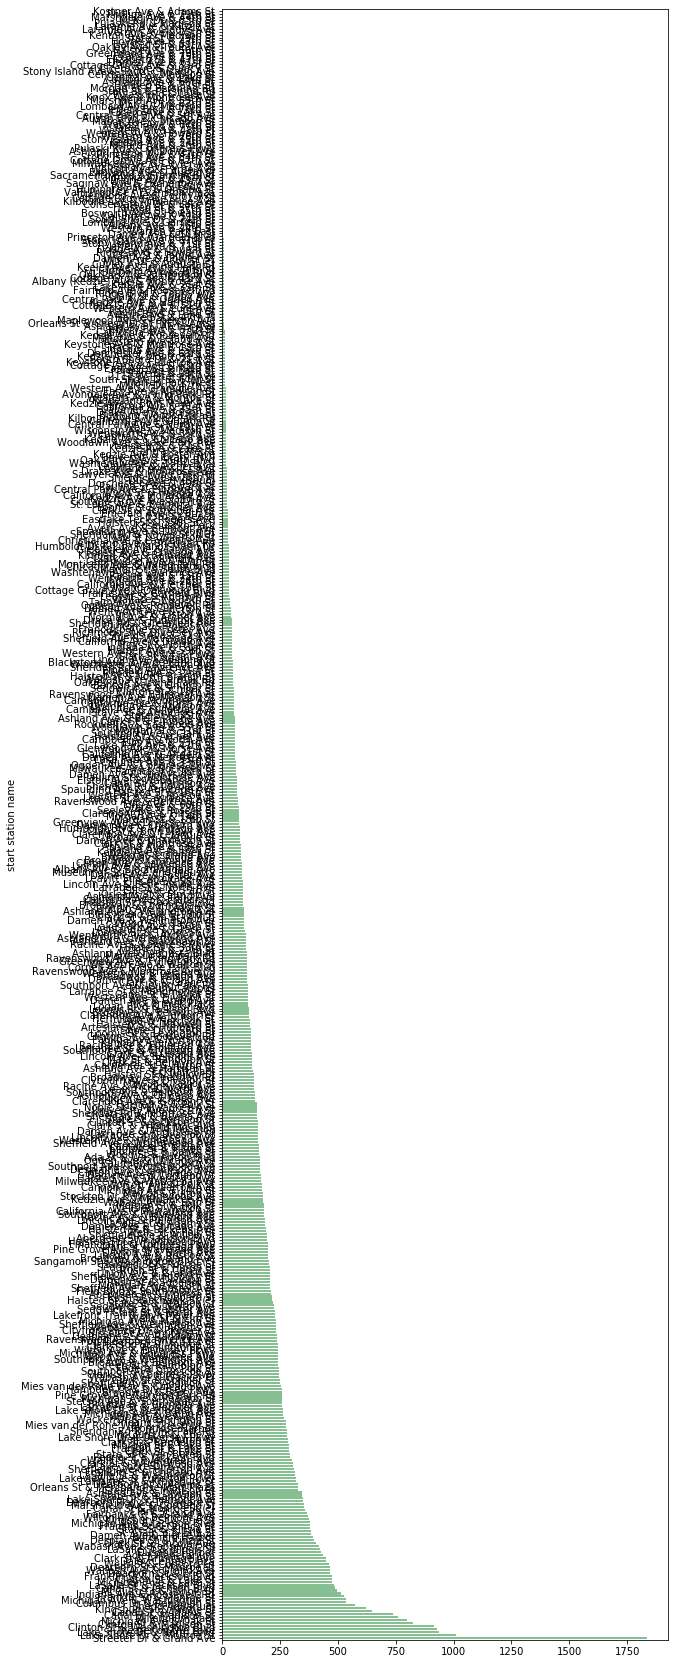

In [440]:
# use the plot function to get the group results
startp = start['end station name'].plot(kind='barh', figsize=(8, 30), color='#86bf91', zorder=2, width=0.7)

Streeter Dr & Grand Ave and Phillips Ave & 79th St are the popular stations that have more than 1000 times usage. And there are many stations with lower usage numbers, such as Pulaski Rd & Madison St MLK Jr Dr & 83rd St, Marshfield Ave & 44th St, Phillips Ave & 79th S, and Kostner Ave & Adams St.

#### Analysis of End Station Name¶


In [441]:
# use describe function to get a statistical summary
chi['end station name'].describe()

count                       72131
unique                        550
top       Streeter Dr & Grand Ave
freq                         2020
Name: end station name, dtype: object

In [442]:
# use groupby function to get the total number of each start station that users have been used
end = chi.groupby('end station name').count()
print(end)

                              start station name  user type  gender  birth  \
end station name                                                             
2112 W Peterson Ave                            8          8       8      8   
63rd St Beach                                 23         23      23     23   
900 W Harrison St                             98         98      98     98   
Aberdeen St & Jackson Blvd                   202        202     202    202   
Aberdeen St & Monroe St                      224        224     224    224   
...                                          ...        ...     ...    ...   
Wood St & Milwaukee Ave                      249        249     249    249   
Wood St & Taylor St                          108        108     108    108   
Woodlawn Ave & 55th St                        57         57      57     57   
Woodlawn Ave & Lake Park Ave                  23         23      23     23   
Yates Blvd & 75th St                           2          2     

There are 550 stations that would be considered as an end station. In addition, connect to the analysis of start station name attributes, the start stations that would be considered as start stations have 549. It means that there is one station that would not be considered as a start station. 

In [443]:
# use sort_value function to ascending number of counts
end = end.sort_values(by=['end station name', 'start station name'])
end.sort_values(by='start station name', ascending=True)

,start station name,user type,gender,birth,month,day,Weekday
end station name,,,,,,,
Laramie Ave & Madison St,1,1,1,1,1,1,1
Pulaski Rd & Eddy St,1,1,1,1,1,1,1
Halsted St & 56th St,1,1,1,1,1,1,1
Halsted St & 51st St,1,1,1,1,1,1,1
Austin Blvd & Chicago Ave,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
Clinton St & Washington Blvd,908,908,908,908,908,908,908
Lake Shore Dr & Monroe St,933,933,933,933,933,933,933
Theater on the Lake,987,987,987,987,987,987,987


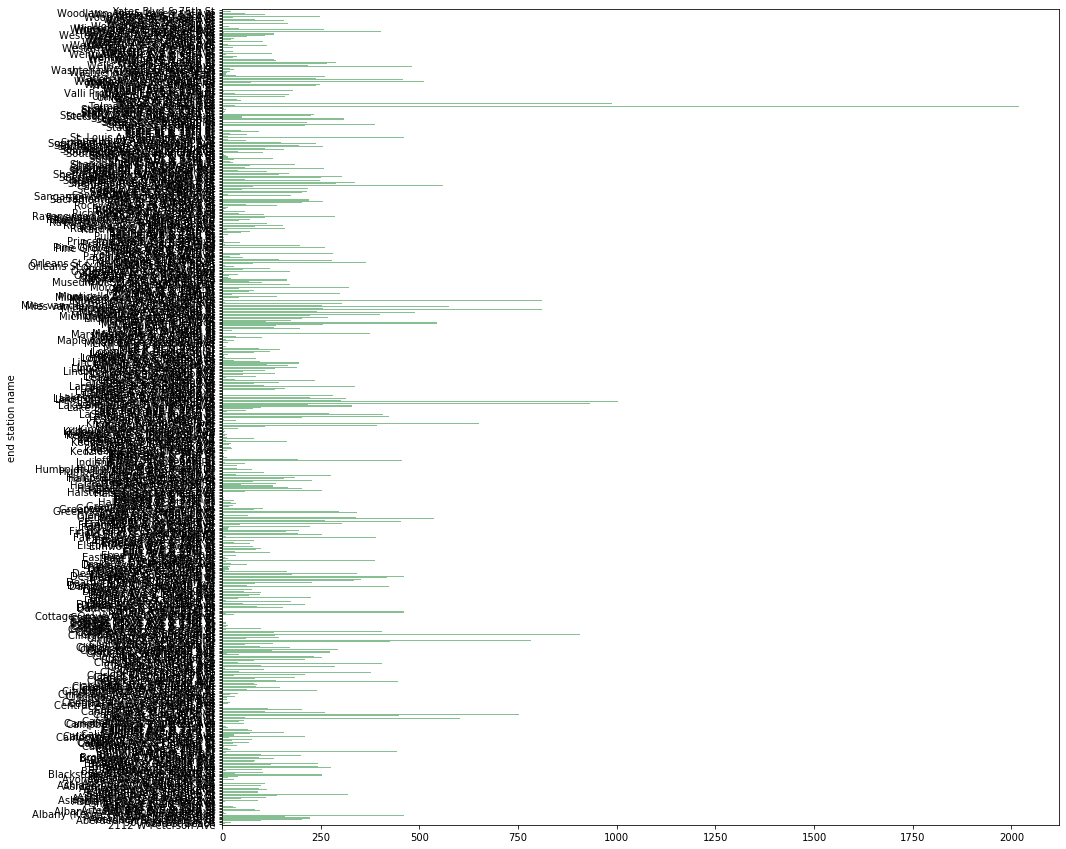

In [444]:
# use the plot function to get the group results
endp = end['start station name'].plot(kind='barh', figsize=(15, 15), color='#86bf91', zorder=2, width=0.7)

The area around the Streeter Dr & Grand Ave (more than 2000 time usage) is the most people would like to go. 

#### Analysis of user type

In [445]:
# use describe function to get a statistical summary
chi['user type'].describe()

count          72131
unique             2
top       Subscriber
freq           54982
Name: user type, dtype: object

In [446]:
# use groupby function to get the total number of each user type
user = chi.groupby('user type').count()
user

,start station name,end station name,gender,birth,month,day,Weekday
user type,,,,,,,
Customer,17149,17149,17149,17149,17149,17149,17149
Subscriber,54982,54982,54982,54982,54982,54982,54982


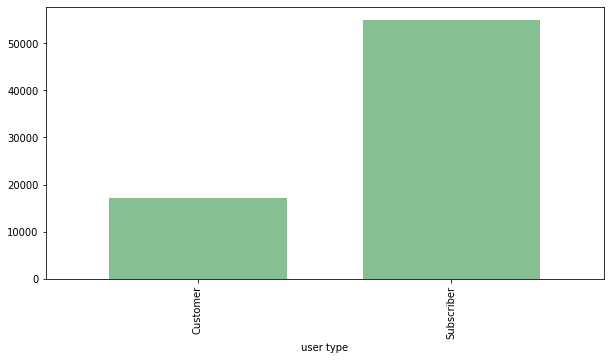

In [447]:
# use the plot function to get the group results
userp= user['start station name'].plot(kind='bar', figsize=(10, 5), color='#86bf91', zorder=2, width=0.7)

The main user type is subscriber.

#### Analysis of Birth Year

In [448]:
# use describe function to get a statistical summary
chi['birth'].describe()

count      72131
unique        72
top       Unknow
freq       17145
Name: birth, dtype: object

In the column birth, there are 17145 users'birth years are unknow. 

In [449]:
# use groupby function get the total number of each birth year
# use head function to show the head of results
birth = chi.groupby('birth').count()
birth.head()

,start station name,end station name,user type,gender,month,day,Weekday
birth,,,,,,,
1899,4,4,4,4,4,4,4
1900,5,5,5,5,5,5,5
1906,5,5,5,5,5,5,5
1915,7,7,7,7,7,7,7
1918,7,7,7,7,7,7,7


In [450]:
# use sort_value function to ascending number of counts
birth = birth.sort_values(by=['birth', 'start station name'])
birth.sort_values(by='start station name', ascending=True)

,start station name,end station name,user type,gender,month,day,Weekday
birth,,,,,,,
1930,1,1,1,1,1,1,1
1938,1,1,1,1,1,1,1
1940,2,2,2,2,2,2,2
1931,2,2,2,2,2,2,2
1899,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...
1990,2835,2835,2835,2835,2835,2835,2835
1987,2847,2847,2847,2847,2847,2847,2847
1988,3091,3091,3091,3091,3091,3091,3091


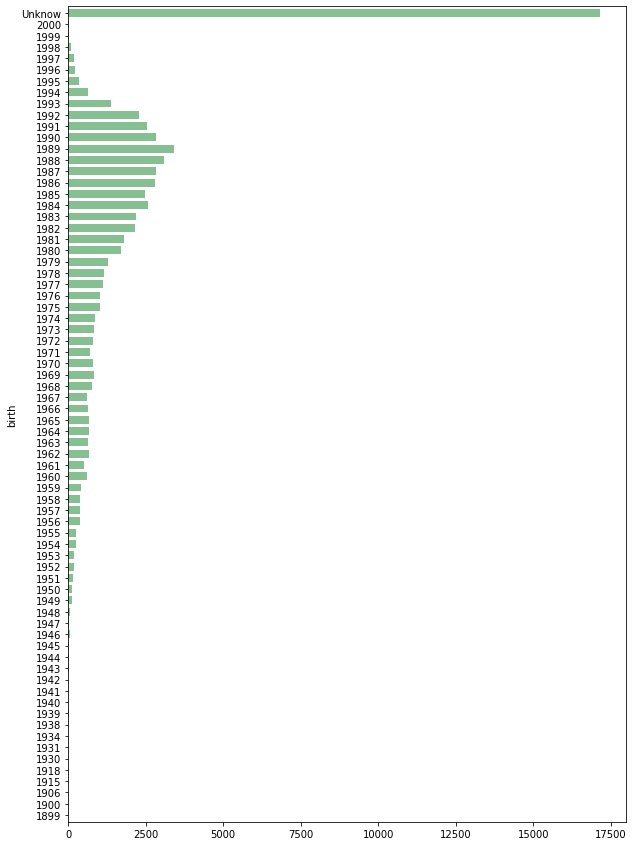

In [451]:
# use the plot function to get the group results
birthp = birth['start station name'].plot(kind='barh', figsize=(10, 15), color='#86bf91', zorder=2, width=0.7)

According to the charts, we can know the main users' birth year concentrate on 1980 - 1992.

#### Analysis of gender

In [452]:
# use describe function to get a statistical summary
chi['gender'].describe()

count     72131
unique        3
top        Male
freq      41194
Name: gender, dtype: object

Female is main users of 2016 NYC bike-sharing.

In [453]:
# use groupby function to get the total number of each gender
# use head function to show the head of results
gender = chi.groupby('gender').count()
gender.head()

,start station name,end station name,user type,birth,month,day,Weekday
gender,,,,,,,
Female,13783,13783,13783,13783,13783,13783,13783
Male,41194,41194,41194,41194,41194,41194,41194
Unknow,17154,17154,17154,17154,17154,17154,17154


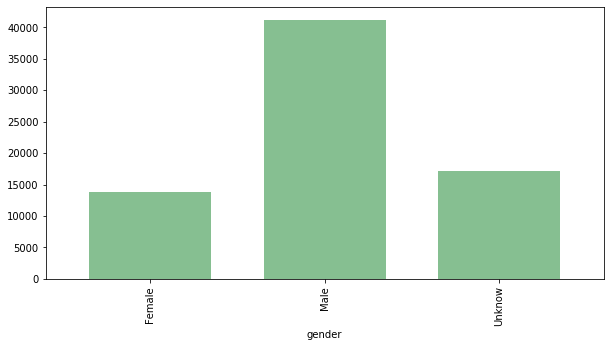

In [454]:
# use the plot function to get the group results
genderp = gender['start station name'].plot(kind='bar', figsize=(10, 5), color='#86bf91', zorder=2, width=0.7)

Male is the main users of 2016 Chicago bike-sharing.

### Analysis of Month

In [455]:
# use describe function to get a statistical summary
chi['month'].describe()

count    72131.00000
mean         7.00915
std          2.62760
min          1.00000
25%          5.00000
50%          7.00000
75%          9.00000
max         12.00000
Name: month, dtype: float64

In [456]:
# use groupby function get the total number of each month
mon = chi.groupby('month').count()
print(mon)

       start station name  end station name  user type  gender  birth    day  \
month                                                                          
1                    1901              1901       1901    1901   1901   1901   
2                    2394              2394       2394    2394   2394   2394   
3                    3719              3719       3719    3719   3719   3719   
4                    4567              4567       4567    4567   4567   4567   
5                    7211              7211       7211    7211   7211   7211   
6                    9792              9792       9792    9792   9792   9792   
7                   10286             10286      10286   10286  10286  10286   
8                    9812              9812       9812    9812   9812   9812   
9                    8699              8699       8699    8699   8699   8699   
10                   7161              7161       7161    7161   7161   7161   
11                   4811              4

In [457]:
# use sort_value function to ascending number of counts
mon = mon.sort_values(by=['month', 'start station name'])
mon.sort_values(by='start station name',ascending=True)

,start station name,end station name,user type,gender,birth,day,Weekday
month,,,,,,,
12,1778,1778,1778,1778,1778,1778,1778
1,1901,1901,1901,1901,1901,1901,1901
2,2394,2394,2394,2394,2394,2394,2394
3,3719,3719,3719,3719,3719,3719,3719
4,4567,4567,4567,4567,4567,4567,4567
11,4811,4811,4811,4811,4811,4811,4811
10,7161,7161,7161,7161,7161,7161,7161
5,7211,7211,7211,7211,7211,7211,7211
9,8699,8699,8699,8699,8699,8699,8699


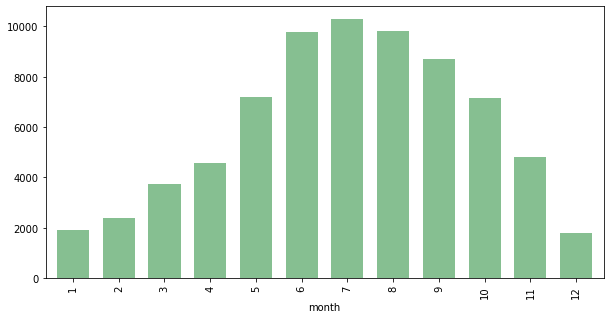

In [458]:
# use the plot function to get the group results
monp= mon['start station name'].plot(kind='bar', figsize=(10, 5), color='#86bf91', zorder=2, width=0.7)

The main months' usage is from June to August.

#### Analysis of Day

In [459]:
# use describe function to get a statistical summary
chi['day'].describe()

count    72131.000000
mean        15.730421
std          8.755173
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: day, dtype: float64

In [460]:
# use groupby function get the total number of each  day
day = chi.groupby('day').count()
day

,start station name,end station name,user type,gender,birth,month,Weekday
day,,,,,,,
1,2120,2120,2120,2120,2120,2120,2120
2,2249,2249,2249,2249,2249,2249,2249
3,2519,2519,2519,2519,2519,2519,2519
4,2393,2393,2393,2393,2393,2393,2393
5,2556,2556,2556,2556,2556,2556,2556
6,2395,2395,2395,2395,2395,2395,2395
7,2460,2460,2460,2460,2460,2460,2460
8,2511,2511,2511,2511,2511,2511,2511
9,2326,2326,2326,2326,2326,2326,2326


In [461]:
# use sort_value function to ascending number of counts
day = day.sort_values(by=['day', 'start station name'])
day.sort_values(by='start station name',ascending=True)

,start station name,end station name,user type,gender,birth,month,Weekday
day,,,,,,,
31,1262,1262,1262,1262,1262,1262,1262
12,2046,2046,2046,2046,2046,2046,2046
1,2120,2120,2120,2120,2120,2120,2120
13,2144,2144,2144,2144,2144,2144,2144
30,2159,2159,2159,2159,2159,2159,2159
27,2179,2179,2179,2179,2179,2179,2179
10,2210,2210,2210,2210,2210,2210,2210
24,2215,2215,2215,2215,2215,2215,2215
26,2241,2241,2241,2241,2241,2241,2241


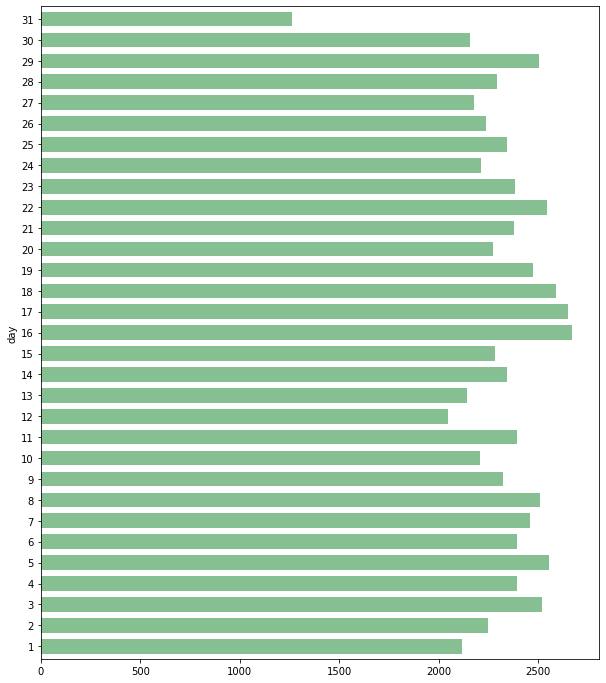

In [462]:
# use the plot function to get the group results
dayp= day['start station name'].plot(kind='barh', figsize=(10, 12), color='#86bf91', zorder=2, width=0.7)

Almost every day has the same number of usages.

#### Analysis of Weekday

In [463]:
# use describe function to get a statistical summary
chi['Weekday'].describe()

count      72131
unique         7
top       Monday
freq       11286
Name: Weekday, dtype: object

In [464]:
# use groupby function get the total number of each week
week = chi.groupby('Weekday').count()
print(week)

           start station name  end station name  user type  gender  birth  \
Weekday                                                                     
Friday                  10741             10741      10741   10741  10741   
Monday                  11286             11286      11286   11286  11286   
Saturday                 9927              9927       9927    9927   9927   
Sunday                   9654              9654       9654    9654   9654   
Thursday                10008             10008      10008   10008  10008   
Tuesday                 10911             10911      10911   10911  10911   
Wednesday                9604              9604       9604    9604   9604   

           month    day  
Weekday                  
Friday     10741  10741  
Monday     11286  11286  
Saturday    9927   9927  
Sunday      9654   9654  
Thursday   10008  10008  
Tuesday    10911  10911  
Wednesday   9604   9604  


In [466]:
# use sort_value function to ascending number of counts
week = week.sort_values(by=['Weekday', 'start station name'])
week.sort_values(by='start station name', ascending=True)

,start station name,end station name,user type,gender,birth,month,day
Weekday,,,,,,,
Wednesday,9604,9604,9604,9604,9604,9604,9604
Sunday,9654,9654,9654,9654,9654,9654,9654
Saturday,9927,9927,9927,9927,9927,9927,9927
Thursday,10008,10008,10008,10008,10008,10008,10008
Friday,10741,10741,10741,10741,10741,10741,10741
Tuesday,10911,10911,10911,10911,10911,10911,10911
Monday,11286,11286,11286,11286,11286,11286,11286


Monday is the weekday that least people would like to use the bike-sharing in 2016 Chicago.

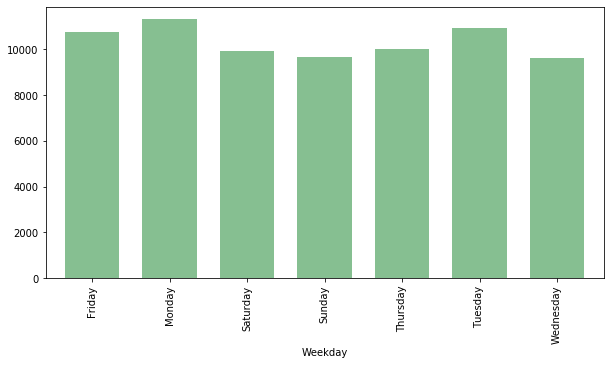

In [467]:
# use the plot function to get the group results
weekp = week['start station name'].plot(kind='bar', figsize=(10, 5), color='#86bf91', zorder=2, width=0.7)

Almost every day has the same number of bike-sharing usages.

### The analysis of NYC2016 
1. read the NYC.csv file from Github
2. clean up the dataset, including sperate the data time, remove the unuseful columns, and replace the meaningful string
3. change each columns's datatypes as we want
4. make the statistical summary for each attribute that I selected
5. make the graphics for each attribute
6. give the conclusion of each chart

In [207]:
# extract the useful column for the analysis
df = pd.read_csv('https://raw.githubusercontent.com/mandy941/new/master/NYC2016.csv')
df               

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Gender,Trip_Duration_in_min
0,362,2016/1/1 0:02,2016/1/1 0:08,3186,Grove St PATH,3209,Brunswick St,24647,Subscriber,1964,2,6
1,200,2016/1/1 0:18,2016/1/1 0:21,3186,Grove St PATH,3213,Van Vorst Park,24605,Subscriber,1962,1,3
2,202,2016/1/1 0:18,2016/1/1 0:21,3186,Grove St PATH,3213,Van Vorst Park,24689,Subscriber,1962,2,3
3,248,2016/1/1 0:23,2016/1/1 0:27,3209,Brunswick St,3203,Hamilton Park,24693,Subscriber,1984,1,4
4,903,2016/1/1 1:03,2016/1/1 1:18,3195,Sip Ave,3210,Pershing Field,24573,Customer,1984,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...
494597,288,2016/12/30 22:15,2016/12/30 22:20,3186,Grove St PATH,3205,JC Medical Center,24409,Subscriber,1989,2,5
494598,533,2016/12/30 22:33,2016/12/30 22:41,3195,Sip Ave,3207,Oakland Ave,24486,Subscriber,1993,2,9
494599,71,2016/12/30 22:42,2016/12/30 22:43,3186,Grove St PATH,3185,City Hall,24513,Subscriber,1957,1,1
494600,233,2016/12/30 23:19,2016/12/30 23:23,3186,Grove St PATH,3209,Brunswick St,26281,Subscriber,1976,1,4


### Clean up the dataset

In [126]:
# extract the useful column for the analysis
df = df.iloc[:, [1, 4, 6, 8, 9, 10,11]]
df.head()

,Start Time,Start Station Name,End Station Name,User Type,Birth Year,Gender,Trip_Duration_in_min
0,2016/1/1 0:02,Grove St PATH,Brunswick St,Subscriber,1964,2,6
1,2016/1/1 0:18,Grove St PATH,Van Vorst Park,Subscriber,1962,1,3
2,2016/1/1 0:18,Grove St PATH,Van Vorst Park,Subscriber,1962,2,3
3,2016/1/1 0:23,Brunswick St,Hamilton Park,Subscriber,1984,1,4
4,2016/1/1 1:03,Sip Ave,Pershing Field,Customer,1984,0,15


In [127]:
# use info function to get the basic information of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494602 entries, 0 to 494601
Data columns (total 7 columns):
Start Time              494602 non-null object
Start Station Name      494602 non-null object
End Station Name        494602 non-null object
User Type               494602 non-null object
Birth Year              494602 non-null int64
Gender                  494602 non-null int64
Trip_Duration_in_min    494602 non-null int64
dtypes: int64(3), object(4)
memory usage: 26.4+ MB


There are 494602 rows of the dataset, which means that in 2016 NYC, the numbers of bike-sharing using is 494602 times. 

In [128]:
# clean up the dataset
# usse datetime function to make column star time to be datetime format
df['Start Time'] = pd.to_datetime(df['Start Time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494602 entries, 0 to 494601
Data columns (total 7 columns):
Start Time              494602 non-null datetime64[ns]
Start Station Name      494602 non-null object
End Station Name        494602 non-null object
User Type               494602 non-null object
Birth Year              494602 non-null int64
Gender                  494602 non-null int64
Trip_Duration_in_min    494602 non-null int64
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 26.4+ MB


C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [129]:
# add the column weekday of the dataset
# print the result with head
df['Weekday'] = df['Start Time'].dt.weekday_name.astype(str)
df.head()

C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Start Time,Start Station Name,End Station Name,User Type,Birth Year,Gender,Trip_Duration_in_min,Weekday
0,2016-01-01 00:02:00,Grove St PATH,Brunswick St,Subscriber,1964,2,6,Friday
1,2016-01-01 00:18:00,Grove St PATH,Van Vorst Park,Subscriber,1962,1,3,Friday
2,2016-01-01 00:18:00,Grove St PATH,Van Vorst Park,Subscriber,1962,2,3,Friday
3,2016-01-01 00:23:00,Brunswick St,Hamilton Park,Subscriber,1984,1,4,Friday
4,2016-01-01 01:03:00,Sip Ave,Pershing Field,Customer,1984,0,15,Friday


In [130]:
# add the column month of the dataset
# print the result with head
df['Month'] = df['Start Time'].dt.month.astype(str)
df.head()

C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Start Time,Start Station Name,End Station Name,User Type,Birth Year,Gender,Trip_Duration_in_min,Weekday,Month
0,2016-01-01 00:02:00,Grove St PATH,Brunswick St,Subscriber,1964,2,6,Friday,1
1,2016-01-01 00:18:00,Grove St PATH,Van Vorst Park,Subscriber,1962,1,3,Friday,1
2,2016-01-01 00:18:00,Grove St PATH,Van Vorst Park,Subscriber,1962,2,3,Friday,1
3,2016-01-01 00:23:00,Brunswick St,Hamilton Park,Subscriber,1984,1,4,Friday,1
4,2016-01-01 01:03:00,Sip Ave,Pershing Field,Customer,1984,0,15,Friday,1


In [132]:
# add the column month of the dataset
# print the result with head
df['Day'] = df['Start Time'].dt.day.astype(str)
df.head()

C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Start Time,Start Station Name,End Station Name,User Type,Birth Year,Gender,Trip_Duration_in_min,Weekday,Month,Day
0,2016-01-01 00:02:00,Grove St PATH,Brunswick St,Subscriber,1964,2,6,Friday,1,1
1,2016-01-01 00:18:00,Grove St PATH,Van Vorst Park,Subscriber,1962,1,3,Friday,1,1
2,2016-01-01 00:18:00,Grove St PATH,Van Vorst Park,Subscriber,1962,2,3,Friday,1,1
3,2016-01-01 00:23:00,Brunswick St,Hamilton Park,Subscriber,1984,1,4,Friday,1,1
4,2016-01-01 01:03:00,Sip Ave,Pershing Field,Customer,1984,0,15,Friday,1,1


Because the dataset has the trip duration in min column, after I clean up the start time column, I drop it. 

In [133]:
# use drop function to drop start time column
df = df.drop(columns = ['Start Time'])
df.head()

,Start Station Name,End Station Name,User Type,Birth Year,Gender,Trip_Duration_in_min,Weekday,Month,Day
0,Grove St PATH,Brunswick St,Subscriber,1964,2,6,Friday,1,1
1,Grove St PATH,Van Vorst Park,Subscriber,1962,1,3,Friday,1,1
2,Grove St PATH,Van Vorst Park,Subscriber,1962,2,3,Friday,1,1
3,Brunswick St,Hamilton Park,Subscriber,1984,1,4,Friday,1,1
4,Sip Ave,Pershing Field,Customer,1984,0,15,Friday,1,1


In [134]:
# make 2 = male, 1 = female and 0 = unknow
# print the result with head
df1 = df.replace({'Gender':{2 :'Male', 1 :'Female', 0: 'Unknow'}})
df1.head()

,Start Station Name,End Station Name,User Type,Birth Year,Gender,Trip_Duration_in_min,Weekday,Month,Day
0,Grove St PATH,Brunswick St,Subscriber,1964,Male,6,Friday,1,1
1,Grove St PATH,Van Vorst Park,Subscriber,1962,Female,3,Friday,1,1
2,Grove St PATH,Van Vorst Park,Subscriber,1962,Male,3,Friday,1,1
3,Brunswick St,Hamilton Park,Subscriber,1984,Female,4,Friday,1,1
4,Sip Ave,Pershing Field,Customer,1984,Unknow,15,Friday,1,1


### Analyze each attributes of the dataset with Statistical summary and chart

#### Analysis of  Start Station Name

In [135]:
# use describe function to get a statistical summary
df1['Start Station Name'].describe()

count            494602
unique               51
top       Grove St PATH
freq              57432
Name: Start Station Name, dtype: object

There are 51 bike-sharing station in 2016 NYC. And the most popular station is Grove St PATH. 

In [136]:
# use groupby function get the total number of each station that users have been used
start = df1.groupby('Start Station Name').count()
print(start)

                         End Station Name  User Type  Birth Year  Gender  \
Start Station Name                                                         
5 Corners Library                    5454       5454        5454    5454   
Astor Place                           354        354         354     354   
Baldwin at Montgomery                9050       9050        9050    9050   
Bayside Park                          690        690         690     690   
Bethune Center                         58         58          58      58   
Brunswick & 6th                      1702       1702        1702    1702   
Brunswick St                        19134      19134       19134   19134   
Central Ave                          4466       4466        4466    4466   
Christ Hospital                      4730       4730        4730    4730   
City Hall                           15552      15552       15552   15552   
Columbia Park                         384        384         384     384   
Columbus Dri

In [137]:
# use sort_value function to ascending number of counts
start = start.sort_values(by=['Start Station Name', 'End Station Name'])
start.sort_values(by='End Station Name', ascending=True)

,End Station Name,User Type,Birth Year,Gender,Trip_Duration_in_min,Weekday,Month,Day
Start Station Name,,,,,,,,
JCBS Depot,2,2,2,2,2,2,2,2
Bethune Center,58,58,58,58,58,58,58,58
Communipaw & Berry Lane,66,66,66,66,66,66,66,66
Danforth Light Rail,120,120,120,120,120,120,120,120
Astor Place,354,354,354,354,354,354,354,354
Columbia Park,384,384,384,384,384,384,384,384
West Side Light Rail,478,478,478,478,478,478,478,478
MLK Light Rail,486,486,486,486,486,486,486,486
Bayside Park,690,690,690,690,690,690,690,690


The JCBS Depot bike-sharing's station has the least users in 2016 NYC.

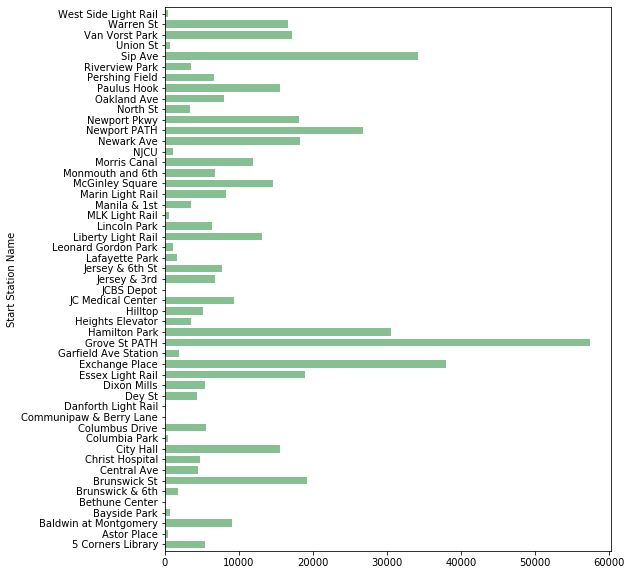

In [138]:
# use the plot function to get the group results
startp = start['End Station Name'].plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.7)

Grove St PATH,Exchange Place,Sip Ave, and Hamilton Park are the popular station which have more than 30000 times usage.And just JCBS Depot
has less than 10 times usage in 2016 NYC.

#### Analysis of  End Station Name

In [139]:
# use describe function to get a statistical summary
df1['End Station Name'].describe()

count            494602
unique              102
top       Grove St PATH
freq              76528
Name: End Station Name, dtype: object

In [140]:
#use groupby function get the total number of each station that users have been used
end = df1.groupby('End Station Name').count()
print(end)

                         Start Station Name  User Type  Birth Year  Gender  \
End Station Name                                                             
12 Ave & W 40 St                         10         10          10      10   
5 Corners Library                      4490       4490        4490    4490   
6 Ave & Broome St                         2          2           2       2   
6 Ave & W 33 St                           2          2           2       2   
Allen St & Rivington St                   2          2           2       2   
...                                     ...        ...         ...     ...   
West Side Light Rail                    744        744         744     744   
West St & Chambers St                     2          2           2       2   
West Thames St                            4          4           4       4   
William St & Pine St                      2          2           2       2   
York St & Jay St                          2          2          

There are 102 station that bike-sharing users make it as end position.

In [141]:
# use sort_value function to ascending number of counts
end = end.sort_values(by=['End Station Name', 'Start Station Name'])
end.sort_values(by='Start Station Name', ascending=True)

,Start Station Name,User Type,Birth Year,Gender,Trip_Duration_in_min,Weekday,Month,Day
End Station Name,,,,,,,,
York St & Jay St,2,2,2,2,2,2,2,2
William St & Pine St,2,2,2,2,2,2,2,2
Roebling St & N 4 St,2,2,2,2,2,2,2,2
Riverside Dr & W 82 St,2,2,2,2,2,2,2,2
Riverside Dr & W 78 St,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...
Newport PATH,27046,27046,27046,27046,27046,27046,27046,27046
Hamilton Park,30816,30816,30816,30816,30816,30816,30816,30816
Sip Ave,31748,31748,31748,31748,31748,31748,31748,31748


Most of bike-sharing users would like to go to the Grove St PATH. 

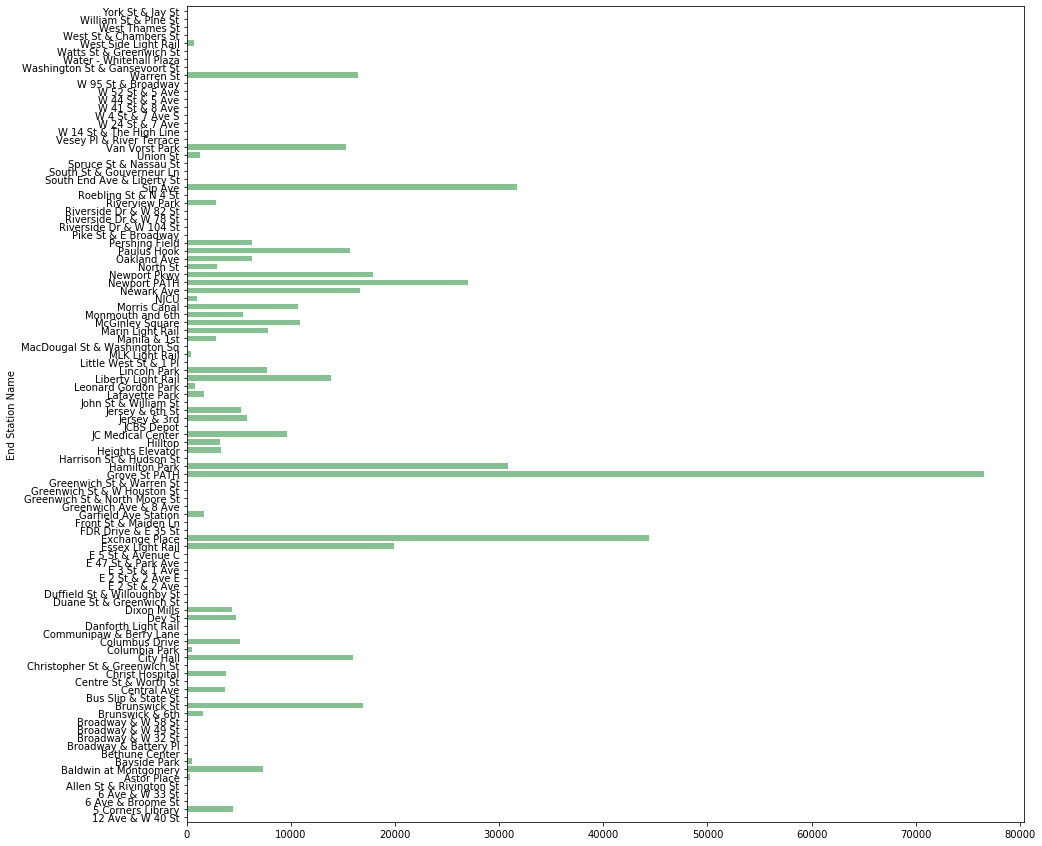

In [142]:
# use the plot function to get the group results
endp = end['Start Station Name'].plot(kind='barh', figsize=(15, 15), color='#86bf91', zorder=2, width=0.7)

There is a total of 102 stations that bike-sharing users have been gone. And the most popular one is the Grove St PATH. There are five stations that are hot(more than 30000 times usage in 2016 NYC), including Hamilton Park, Sip Ave, Exchange Place, and Grove St PATH. There are many stations with lower numbers.

#### Analysis of user type

In [143]:
# use describe function to get a statistical summary
df1['User Type'].describe()

count         494602
unique             2
top       Subscriber
freq          463576
Name: User Type, dtype: object

There are 463579 users are subscriber.

In [144]:
# use groupby function get the total number of each users types 
user = df1.groupby('User Type').count()
user

,Start Station Name,End Station Name,Birth Year,Gender,Trip_Duration_in_min,Weekday,Month,Day
User Type,,,,,,,,
Customer,31026,31026,31026,31026,31026,31026,31026,31026
Subscriber,463576,463576,463576,463576,463576,463576,463576,463576


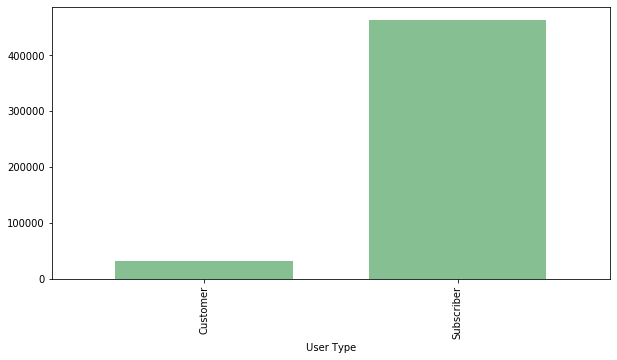

In [145]:
# use the plot function to get the group results
userp= user['Start Station Name'].plot(kind='bar', figsize=(10, 5), color='#86bf91', zorder=2, width=0.7)

There are most of user type is subscriber.

#### Analysis of Birth Year

In [146]:
# use describe function to get a statistical summary
df1['Birth Year'].describe()

count    494602.000000
mean       1979.694255
std           9.302147
min        1900.000000
25%        1975.000000
50%        1982.000000
75%        1986.000000
max        2000.000000
Name: Birth Year, dtype: float64

In 2016, the max birth year of bike-sharing users is 1900 and the min is 2000.

In [147]:
# use groupby function get the total number of birth year 
# use head function to show the head of results
birth = df1.groupby('Birth Year').count()
birth.head()

,Start Station Name,End Station Name,User Type,Gender,Trip_Duration_in_min,Weekday,Month,Day
Birth Year,,,,,,,,
1900,2,2,2,2,2,2,2,2
1934,2,2,2,2,2,2,2,2
1937,8,8,8,8,8,8,8,8
1940,6,6,6,6,6,6,6,6
1941,200,200,200,200,200,200,200,200


In [148]:
# use sort_value function to ascending number of counts
birth = birth.sort_values(by=['Birth Year', 'Start Station Name'])
birth.sort_values(by='Start Station Name', ascending=True)

,Start Station Name,End Station Name,User Type,Gender,Trip_Duration_in_min,Weekday,Month,Day
Birth Year,,,,,,,,
1900,2,2,2,2,2,2,2,2
1934,2,2,2,2,2,2,2,2
1940,6,6,6,6,6,6,6,6
1937,8,8,8,8,8,8,8,8
1943,12,12,12,12,12,12,12,12
...,...,...,...,...,...,...,...,...
1985,21570,21570,21570,21570,21570,21570,21570,21570
1983,22416,22416,22416,22416,22416,22416,22416,22416
1981,24528,24528,24528,24528,24528,24528,24528,24528


There are 64 different birth years of bike-sharing users in 2016 NYC.

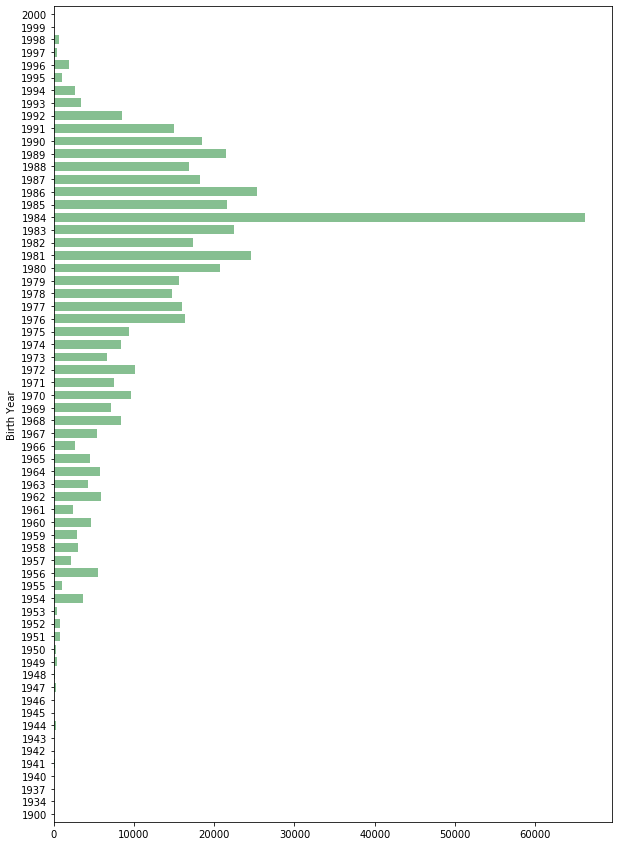

In [149]:
# use the plot function to get the group results
birthp = birth['Start Station Name'].plot(kind='barh', figsize=(10, 15), color='#86bf91', zorder=2, width=0.7)

According to the charts, we can know the main users' birth year concentrate on 1992 - 1975.

#### Analysis of gender

In [150]:
#use describe function to get a statistical summary
df1['Gender'].describe()

count     494602
unique         3
top       Female
freq      353976
Name: Gender, dtype: object

Female is main users of 2016 NYC bike-sharing.

In [151]:
# use groupby function get the total number of each gender
# use head function to show the head of results
gender = df1.groupby('Gender').count()
gender.head()

,Start Station Name,End Station Name,User Type,Birth Year,Trip_Duration_in_min,Weekday,Month,Day
Gender,,,,,,,,
Female,353976,353976,353976,353976,353976,353976,353976,353976
Male,100850,100850,100850,100850,100850,100850,100850,100850
Unknow,39776,39776,39776,39776,39776,39776,39776,39776


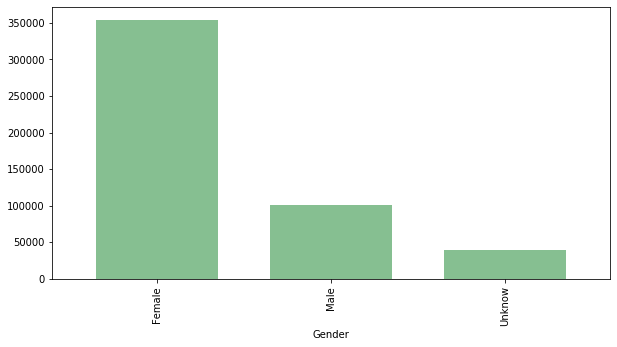

In [152]:
# use the plot function to get the group results
genderp = gender['Start Station Name'].plot(kind='bar', figsize=(10, 5), color='#86bf91', zorder=2, width=0.7)

Female is at least twofold of male in 2016 NYC.

#### Analysis of Trip_Duration_in_min

In [153]:
# use describe function to get a statistical summary
d = df1['Trip_Duration_in_min'].describe()
d

count    494602.000000
mean         14.752472
std         599.290328
min           1.000000
25%           4.000000
50%           6.000000
75%          11.000000
max      272163.000000
Name: Trip_Duration_in_min, dtype: float64

The average min of bike-sharing usage is 15 in 2016 NYC.

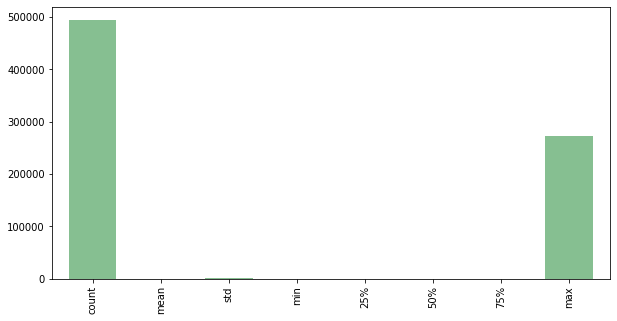

In [154]:
# use the plot function to get the describe results
durationp = d.plot(kind='bar', figsize=(10, 5), color='#86bf91', zorder=2, width=0.7)

   The average min of the bike-sharing users is 15 min.And the standard deviation is 599. 75% of the users ride the bike is around 11 min.

#### Analysis of Weekday

In [155]:
# use describe function to get a statistical summary
df1['Weekday'].describe()

count        494602
unique            7
top       Wednesday
freq          81108
Name: Weekday, dtype: object

 Wednesday is the weekday that most people would like to use the bike-sharing in 2016 NYC.

In [156]:
# use groupby function get the total number of  each weekday
# use head function to show the head of results
week = df1.groupby('Weekday').count()
print(week)

           Start Station Name  End Station Name  User Type  Birth Year  \
Weekday                                                                  
Friday                  74538             74538      74538       74538   
Monday                  72698             72698      72698       72698   
Saturday                55388             55388      55388       55388   
Sunday                  54152             54152      54152       54152   
Thursday                79130             79130      79130       79130   
Tuesday                 77588             77588      77588       77588   
Wednesday               81108             81108      81108       81108   

           Gender  Trip_Duration_in_min  Month    Day  
Weekday                                                
Friday      74538                 74538  74538  74538  
Monday      72698                 72698  72698  72698  
Saturday    55388                 55388  55388  55388  
Sunday      54152                 54152  54152  54152

In [157]:
# use sort_value function to ascending number of counts
week = week.sort_values(by=['Weekday', 'Start Station Name'])
week.sort_values(by='Start Station Name', ascending=True)

,Start Station Name,End Station Name,User Type,Birth Year,Gender,Trip_Duration_in_min,Month,Day
Weekday,,,,,,,,
Sunday,54152,54152,54152,54152,54152,54152,54152,54152
Saturday,55388,55388,55388,55388,55388,55388,55388,55388
Monday,72698,72698,72698,72698,72698,72698,72698,72698
Friday,74538,74538,74538,74538,74538,74538,74538,74538
Tuesday,77588,77588,77588,77588,77588,77588,77588,77588
Thursday,79130,79130,79130,79130,79130,79130,79130,79130
Wednesday,81108,81108,81108,81108,81108,81108,81108,81108


Sunday is the weekday that least people would like to use the bike-sharing in 2016 NYC.

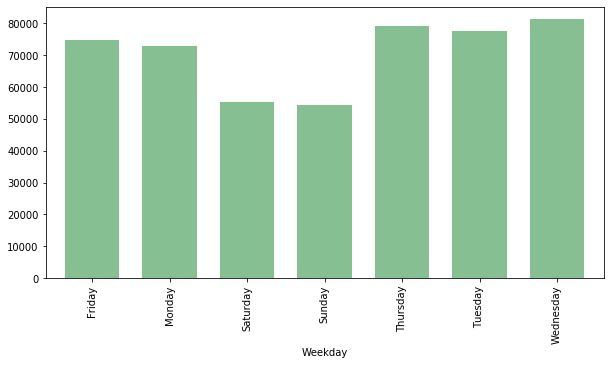

In [158]:
# use the plot function to get the group results
weekp = week['Start Station Name'].plot(kind='bar', figsize=(10, 5), color='#86bf91', zorder=2, width=0.7)

Sunday and Saturday are fewer users and other weekdays will be more users. 

#### Analysis of Month

In [159]:
# use describe function to get a statistical summary
df1['Month'].describe()

count     494602
unique        12
top            8
freq       68298
Name: Month, dtype: object

The August is the month that has the most users in 2016 NYC.

In [160]:
# use groupby function get the total number of each month
mon = df1.groupby('Month').count()
print(mon)

       Start Station Name  End Station Name  User Type  Birth Year  Gender  \
Month                                                                        
1                   14958             14958      14958       14958   14958   
10                  59222             59222      59222       59222   59222   
11                  43664             43664      43664       43664   43664   
12                  29662             29662      29662       29662   29662   
2                   16500             16500      16500       16500   16500   
3                   27022             27022      27022       27022   27022   
4                   32684             32684      32684       32684   32684   
5                   38976             38976      38976       38976   38976   
6                   47894             47894      47894       47894   47894   
7                   48872             48872      48872       48872   48872   
8                   68298             68298      68298       682

In [161]:
# use sort_value function to ascending number of counts
mon = mon.sort_values(by=['Month', 'Start Station Name'])
mon.sort_values(by='Start Station Name',ascending=True)

,Start Station Name,End Station Name,User Type,Birth Year,Gender,Trip_Duration_in_min,Weekday,Day
Month,,,,,,,,
1,14958,14958,14958,14958,14958,14958,14958,14958
2,16500,16500,16500,16500,16500,16500,16500,16500
3,27022,27022,27022,27022,27022,27022,27022,27022
12,29662,29662,29662,29662,29662,29662,29662,29662
4,32684,32684,32684,32684,32684,32684,32684,32684
5,38976,38976,38976,38976,38976,38976,38976,38976
11,43664,43664,43664,43664,43664,43664,43664,43664
6,47894,47894,47894,47894,47894,47894,47894,47894
7,48872,48872,48872,48872,48872,48872,48872,48872


January is the month that the lest people use bike-sharing. And  August is the most.

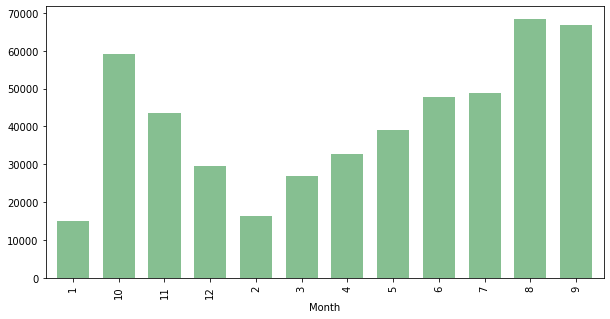

In [162]:
# use the plot function to get the group results
monp= mon['Start Station Name'].plot(kind='bar', figsize=(10, 5), color='#86bf91', zorder=2, width=0.7)

January and February are the lowest usages period with bike-sharing.

#### Analysis of Day

In [163]:
# use describe function to get a statistical summary
df1['Day'].describe()

count     494602
unique        31
top            7
freq       17678
Name: Day, dtype: object

The most frequency day of all the month is 7.

In [164]:
# use groupby function get the total number of each day
day = df1.groupby('Day').count()
day

,Start Station Name,End Station Name,User Type,Birth Year,Gender,Trip_Duration_in_min,Weekday,Month
Day,,,,,,,,
1,15390,15390,15390,15390,15390,15390,15390,15390
10,16144,16144,16144,16144,16144,16144,16144,16144
11,16142,16142,16142,16142,16142,16142,16142,16142
12,17328,17328,17328,17328,17328,17328,17328,17328
13,16624,16624,16624,16624,16624,16624,16624,16624
14,16820,16820,16820,16820,16820,16820,16820,16820
15,16466,16466,16466,16466,16466,16466,16466,16466
16,16648,16648,16648,16648,16648,16648,16648,16648
17,17454,17454,17454,17454,17454,17454,17454,17454


In [165]:
# use sort_value function to ascending number of counts
day = day.sort_values(by=['Day', 'Start Station Name'])
day.sort_values(by='Start Station Name',ascending=True)

,Start Station Name,End Station Name,User Type,Birth Year,Gender,Trip_Duration_in_min,Weekday,Month
Day,,,,,,,,
31,8862,8862,8862,8862,8862,8862,8862,8862
30,13114,13114,13114,13114,13114,13114,13114,13114
3,14836,14836,14836,14836,14836,14836,14836,14836
24,14868,14868,14868,14868,14868,14868,14868,14868
29,15046,15046,15046,15046,15046,15046,15046,15046
1,15390,15390,15390,15390,15390,15390,15390,15390
5,15624,15624,15624,15624,15624,15624,15624,15624
25,15640,15640,15640,15640,15640,15640,15640,15640
9,15702,15702,15702,15702,15702,15702,15702,15702


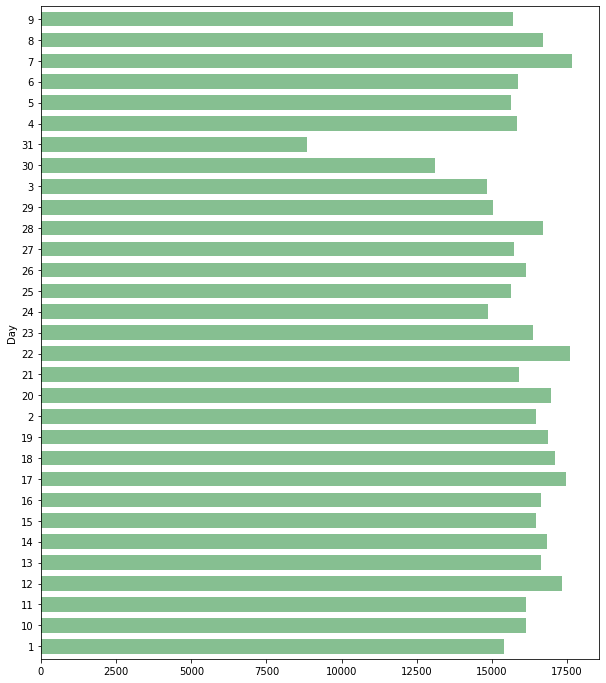

In [166]:
# use the plot function to get the group results
dayp= day['Start Station Name'].plot(kind='barh', figsize=(10, 12), color='#86bf91', zorder=2, width=0.7)

The 31st and 30th are the day that less people want to use bike.

### 1. what does each attributes tell the bike-sharing company? (The answers of question 1 are benificial for us to answer the following questions. ) 
#### In 2016 NYC:
  - Grove St PATH, Exchange Place, Sip Ave, and Hamilton Park are the popular station which has more than 30000 times usage. And just JCBS Depot has less than 10 times usage in 2016 NYC.
  - There is a total of 102 stations that bike-sharing users have been gone(as end station). And the most popular one is the Grove St PATH. There are five stations that are hot(more than 30000 times usage in 2016 NYC), including Hamilton Park, Sip Ave, Exchange Place, and Grove St PATH. There are many stations with lower numbers.
  - There are 463579 users are a subscriber.
  - In 2016, the max birth year of bike-sharing users is 1900 and the min is 2000.
  - There are 64 different birth years of bike-sharing users in 2016 NYC.
  - According to the charts, we can know the main users' birth year concentrate on 1992 - 1975.
  - Female is the main users of 2016 NYC bike-sharing.
  - Female is at least twofold of the male in 2016 NYC.
  - Wednesday is the weekday that most people would like to use the bike-sharing in 2016 NYC.
  - Sunday and Saturday are fewer users and other weekdays will be more users. 
  - January is the month that the lest people use bike-sharing. And  August is the most.
  - The most frequency day of all the month is 7.
  - There are 51 bike-sharing stations that people would like to be considered as start stations in 2016 NYC. And the most popular station is the Grove St PATH.
  -  There are 494602 times bike-sharing's usages in 2016 NYC.

#### In 2016 Chicago:
 - There are 549 bike-sharing stations that people would like to be considered as start stations. And the most popular station is the Grove St PATH.
 - Streeter Dr & Grand Ave and Phillips Ave & 79th St are the popular stations that have more than 1000 times usage. And there are many stations with lower usage numbers, such as Pulaski Rd & Madison St MLK Jr Dr & 83rd St, Marshfield Ave & 44th St, Phillips Ave & 79th S, and Kostner Ave & Adams St.
 - In Chicago, there are 550 stations that would be considered as an end station. In addition, connect to the analysis of start station name attributes, the start stations that would be considered as start stations have 549.
 - The main user type is a subscriber.
 - The main user gender is a male.
 - According to the charts, we can know the main users' birth year concentrate on 1980 - 1992.
 - The average min of the bike-sharing users is 15 min.And the standard deviation is 599. 75% of the users ride the bike is around 11 min.
 - Monday is the weekday that least people would like to use the bike-sharing in 2016 Chicago.
 - Almost every day has the same number of bike-sharing usages.
 - January and February are the lowest usages period with bike-sharing.
 - The main months' usage is from June to August.
 - There are 72131 times bike-sharing's usages in 2016 Chicago.
 

### 2. When (specific time) do people mostly use the bike-sharing service, such as month, weekday and day?

In [512]:
# read the NYC2016.csv file from github
# rename the columns name
# print the result with head 10
nybike=pd.read_csv('https://raw.githubusercontent.com/sunpark92/DAV-5400/master/NYC-CitiBike%202016.csv',parse_dates=['starttime','stoptime'])
print(nybike.shape)
nybike.columns = ['trip duration(second)', 'start time', 'stop time', 'start station id', 'start station name','end station id','end station name','bike id','user type','birth_year','gender']
nybike
nybike.head(10)

(276798, 11)


,trip duration(second),start time,stop time,start station id,start station name,end station id,end station name,bike id,user type,birth_year,gender
0,839,2016-01-01 00:09:00,2016-01-01 00:23:00,532,S 5 Pl & S 4 St,401,Allen St & Rivington St,17109,Customer,NaN,0
1,686,2016-01-01 00:21:00,2016-01-01 00:32:00,3143,5 Ave & E 78 St,3132,E 59 St & Madison Ave,23514,Subscriber,1960.0,1
2,315,2016-01-01 00:33:00,2016-01-01 00:38:00,3164,Columbus Ave & W 72 St,3178,Riverside Dr & W 78 St,14536,Subscriber,1971.0,1
3,739,2016-01-01 00:40:00,2016-01-01 00:53:00,223,W 13 St & 7 Ave,276,Duane St & Greenwich St,24062,Subscriber,1969.0,1
4,1253,2016-01-01 00:44:00,2016-01-01 01:05:00,484,W 44 St & 5 Ave,151,Cleveland Pl & Spring St,16380,Customer,NaN,0
5,525,2016-01-01 00:47:00,2016-01-01 00:55:00,474,5 Ave & E 29 St,470,W 20 St & 8 Ave,22823,Subscriber,1975.0,2
6,659,2016-01-01 00:55:00,2016-01-01 01:06:00,387,Centre St & Chambers St,377,6 Ave & Canal St,18602,Subscriber,1991.0,1
7,464,2016-01-01 01:25:00,2016-01-01 01:33:00,223,W 13 St & 7 Ave,236,St Marks Pl & 2 Ave,22873,Subscriber,1962.0,1
8,206,2016-01-01 01:37:00,2016-01-01 01:40:00,3071,Boerum St & Broadway,3072,Leonard St & Boerum St,23959,Subscriber,1999.0,2
9,425,2016-01-01 01:58:00,2016-01-01 02:05:00,379,W 31 St & 7 Ave,476,E 31 St & 3 Ave,23386,Customer,NaN,0


In [513]:
# clean up the star time column
#use shape function to get the results 
nybike["year"] = nybike["start time"].dt.year
nybike["month"] = nybike["start time"].dt.month
nybike["day"] = nybike["start time"].dt.day
nybike["hour"] = nybike["start time"].dt.hour
nybike["minute"] = nybike["start time"].dt.minute
nybike["second"] = nybike["start time"].dt.second

nybike["year"] = nybike["stop time"].dt.year
nybike["month"] = nybike["stop time"].dt.month
nybike["day"] = nybike["stop time"].dt.day
nybike["hour"] = nybike["stop time"].dt.hour
nybike["minute"] = nybike["stop time"].dt.minute
nybike["second"] = nybike["stop time"].dt.second

nybike.shape

(276798, 17)

In [514]:
# create a new column that shows the weekday
# print the shape results
nybike['day of week']=nybike['start time'].dt.dayofweek
print(nybike.shape)

(276798, 18)


In [516]:
# print the results with head 1
nybike.head(1)

,trip duration(second),start time,stop time,start station id,start station name,end station id,end station name,bike id,user type,birth_year,gender,year,month,day,hour,minute,second,day of week
0,839,2016-01-01 00:09:00,2016-01-01 00:23:00,532,S 5 Pl & S 4 St,401,Allen St & Rivington St,17109,Customer,NaN,0,2016,1,1,0,23,0,4


In [517]:
# name the weekday name
nybike.loc[nybike['day of week']==0, 'Mon-Sun']='Monday'
nybike.loc[nybike['day of week']==1, 'Mon-Sun']='Tuesday'
nybike.loc[nybike['day of week']==2, 'Mon-Sun']='Wednesday'
nybike.loc[nybike['day of week']==3, 'Mon-Sun']='Thursday'
nybike.loc[nybike['day of week']==4, 'Mon-Sun']='Friday'
nybike.loc[nybike['day of week']==5, 'Mon-Sun']='Saturday'
nybike.loc[nybike['day of week']==6, 'Mon-Sun']='Sunday'

nybike[['start time','stop time','day of week','Mon-Sun']].head(10)

,start time,stop time,day of week,Mon-Sun
0,2016-01-01 00:09:00,2016-01-01 00:23:00,4,Friday
1,2016-01-01 00:21:00,2016-01-01 00:32:00,4,Friday
2,2016-01-01 00:33:00,2016-01-01 00:38:00,4,Friday
3,2016-01-01 00:40:00,2016-01-01 00:53:00,4,Friday
4,2016-01-01 00:44:00,2016-01-01 01:05:00,4,Friday
5,2016-01-01 00:47:00,2016-01-01 00:55:00,4,Friday
6,2016-01-01 00:55:00,2016-01-01 01:06:00,4,Friday
7,2016-01-01 01:25:00,2016-01-01 01:33:00,4,Friday
8,2016-01-01 01:37:00,2016-01-01 01:40:00,4,Friday
9,2016-01-01 01:58:00,2016-01-01 02:05:00,4,Friday


[Text(0, 0.5, 'trip duration(second)'),
 Text(0.5, 1.0, 'Trip duration by hour')]

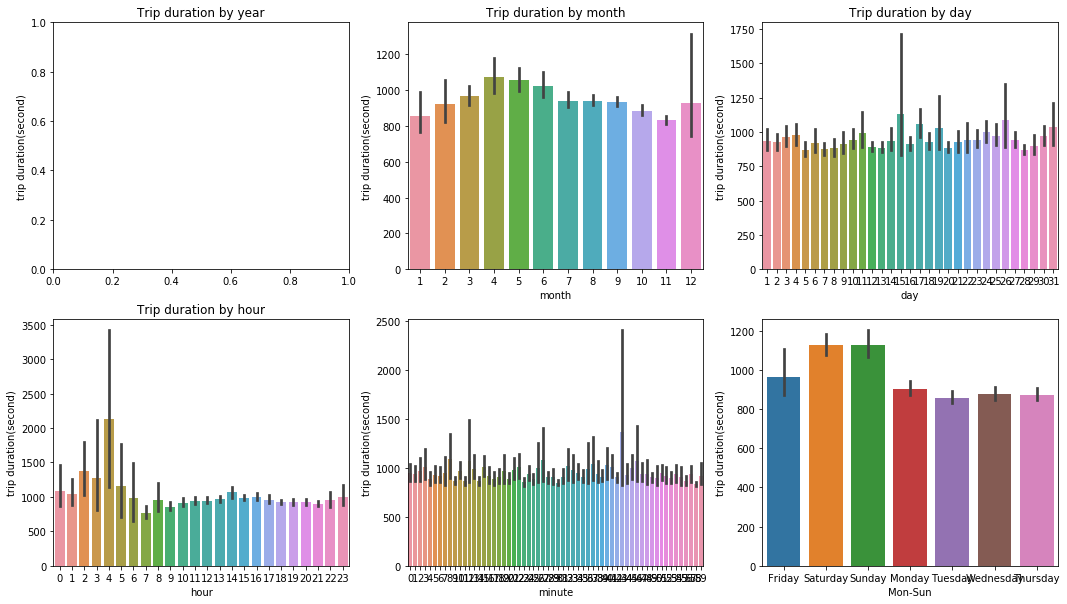

In [518]:
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows = 2, ncols = 3)
figure.set_size_inches(18,10)

sns.barplot(data=nybike, x = "month", y = "trip duration(second)", ax = ax2)
sns.barplot(data=nybike, x = "day", y = "trip duration(second)", ax = ax3)
sns.barplot(data=nybike, x = "hour", y = "trip duration(second)", ax = ax4)
sns.barplot(data=nybike, x = "minute", y = "trip duration(second)", ax = ax5)
sns.barplot(data=nybike, x = "Mon-Sun", y = "trip duration(second)", ax = ax6)

ax1.set(ylabel = "trip duration(second)", title = "Trip duration by year")
ax2.set(ylabel = "trip duration(second)", title = "Trip duration by month")
ax3.set(ylabel = "trip duration(second)", title = "Trip duration by day")
ax4.set(ylabel = "trip duration(second)", title = "Trip duration by hour")

In [489]:
# Change names of value to be more meaningful with provided information
chibike.birth.replace({1960:'1960s',
                            1961:'1960s',
                            1962:'1960s',
                            1963:'1960s',
                            1964:'1960s',
                            1965:'1960s',
                            1966:'1960s',
                            1967:'1960s',
                            1968:'1960s',
                            1969:'1960s',
                            1970:'1970s',
                            1971:'1970s',
                            1972:'1970s',
                            1973:'1970s',
                            1974:'1970s',
                            1975:'1970s',
                            1976:'1970s',
                            1977:'1970s',
                            1978:'1970s',
                            1979:'1970s',
                            1980:'1980s',
                            1981:'1980s',
                            1982:'1980s',
                            1983:'1980s',
                            1984:'1980s',
                            1985:'1980s',
                            1986:'1980s',
                            1987:'1980s',
                            1988:'1980s',
                            1989:'1980s',
                            1990:'1990s',
                            1991:'1990s',
                            1992:'1990s',
                            1993:'1990s',
                            1994:'1990s',
                            1995:'1990s',
                            1996:'1990s',
                            1997:'1990s',
                            1998:'1990s',
                            1999:'1990s'},inplace=True)

In [492]:
# run the chibike
chibike

,start time,stop time,bikeid,trip duration(second),start station id,start station name,end station id,end station name,user type,gender,birth,year,month,day,hour,minute,second,day of week,Mon-Sun
0,2016-03-31 23:30:00,2016-03-31 23:46:00,2295,926,156,Clark St & Wellington Ave,166,Ashland Ave & Wrightwood Ave,Subscriber,Male,1990,2016,3,31,23,46,0,3,Thursday
1,2016-03-31 22:59:00,2016-03-31 23:02:00,3439,198,259,California Ave & Francis Pl,276,California Ave & North Ave,Subscriber,Male,1974,2016,3,31,23,2,0,3,Thursday
2,2016-03-31 22:24:00,2016-03-31 22:26:00,4337,124,344,Ravenswood Ave & Lawrence Ave,242,Damen Ave & Leland Ave,Subscriber,Female,1992,2016,3,31,22,26,0,3,Thursday
3,2016-03-31 22:22:00,2016-03-31 22:41:00,3760,1181,318,Southport Ave & Irving Park Rd,458,Broadway & Thorndale Ave,Subscriber,Female,1979,2016,3,31,22,41,0,3,Thursday
4,2016-03-31 22:08:00,2016-03-31 22:19:00,1270,656,345,Lake Park Ave & 56th St,426,Ellis Ave & 60th St,Subscriber,Female,1997,2016,3,31,22,19,0,3,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72126,2016-10-01 01:40:00,2016-10-01 01:43:00,1651,233,117,Wilton Ave & Belmont Ave,114,Sheffield Ave & Waveland Ave,Subscriber,Male,1971,2016,10,1,1,43,0,5,Saturday
72127,2016-10-01 01:21:00,2016-10-01 01:29:00,4803,472,123,California Ave & Milwaukee Ave,503,Drake Ave & Fullerton Ave,Subscriber,Female,1991,2016,10,1,1,29,0,5,Saturday
72128,2016-10-01 00:35:00,2016-10-01 00:53:00,3906,1069,90,Millennium Park,197,Michigan Ave & Madison St,Customer,,,2016,10,1,0,53,0,5,Saturday
72129,2016-10-01 00:19:00,2016-10-01 00:44:00,5882,1492,300,Broadway & Barry Ave,300,Broadway & Barry Ave,Subscriber,Male,1993,2016,10,1,0,44,0,5,Saturday


[Text(0, 0.5, 'trip duration(second)'),
 Text(0.5, 1.0, 'Rental duration by birth')]

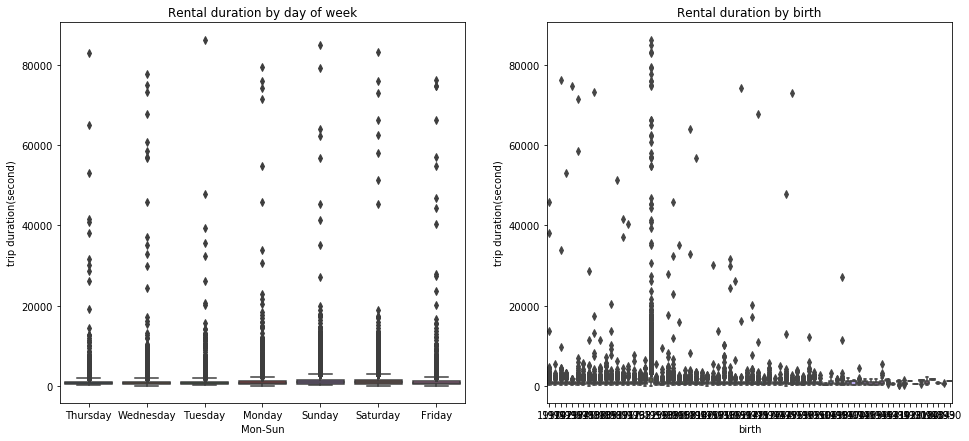

In [519]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 7))
sns.boxplot(data = chibike, y='trip duration(second)', x = 'Mon-Sun', orient = 'v', ax = axes[0])
sns.boxplot(data = chibike, y='trip duration(second)', x = 'birth', orient = 'v', ax = axes[1])

axes[0].set(ylabel = 'trip duration(second)', title = 'Rental duration by day of week')
axes[1].set(ylabel = 'trip duration(second)', title = 'Rental duration by birth')

People in Chicago seem like that they mostly used the bike-sharing services in July 2016.
They also mostly used the bike-sharing services at the beginning of the month and at the end of the month. 
We also could know that people usually used this service during Saturday and Sunday longer than a weekday. 

Unlike people in Chicago, people in New York City seem like that they mostly used the bike-sharing services in April and May in 2016. They also mostly used bike-sharing services at the middle of the month. This result is really different from the previous result from Chicago. 
We also could know people usually used this service during the weekend longer than a weekday. This result is the same as Chicago.

### 3. Which age range of is mostly using bike-sharing service?
1. create the age column for two cities' dataset
2. calculate the age basic on the birth year
3. find the age group basic on describe results
4. use bar plot to show the difference between Chicago and NYC

In [479]:
# add age column to the dataframe df, the current year is 2016,so the age = current year - birth year
# print the results
df1['Age'] = 2016 - df1['Birth Year']
df1

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Gender,Trip_Duration_in_min,Age
0,362,2016/1/1 0:02,2016/1/1 0:08,3186,Grove St PATH,3209,Brunswick St,24647,Subscriber,1964,2,6,52
1,200,2016/1/1 0:18,2016/1/1 0:21,3186,Grove St PATH,3213,Van Vorst Park,24605,Subscriber,1962,1,3,54
2,202,2016/1/1 0:18,2016/1/1 0:21,3186,Grove St PATH,3213,Van Vorst Park,24689,Subscriber,1962,2,3,54
3,248,2016/1/1 0:23,2016/1/1 0:27,3209,Brunswick St,3203,Hamilton Park,24693,Subscriber,1984,1,4,32
4,903,2016/1/1 1:03,2016/1/1 1:18,3195,Sip Ave,3210,Pershing Field,24573,Customer,1984,0,15,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494597,288,2016/12/30 22:15,2016/12/30 22:20,3186,Grove St PATH,3205,JC Medical Center,24409,Subscriber,1989,2,5,27
494598,533,2016/12/30 22:33,2016/12/30 22:41,3195,Sip Ave,3207,Oakland Ave,24486,Subscriber,1993,2,9,23
494599,71,2016/12/30 22:42,2016/12/30 22:43,3186,Grove St PATH,3185,City Hall,24513,Subscriber,1957,1,1,59
494600,233,2016/12/30 23:19,2016/12/30 23:23,3186,Grove St PATH,3209,Brunswick St,26281,Subscriber,1976,1,4,40


In [480]:
#use infor function to see the dtypes of each column
chi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72131 entries, 0 to 72130
Data columns (total 9 columns):
start station name    72131 non-null object
end station name      72131 non-null object
user type             72131 non-null object
gender                72131 non-null object
birth                 72131 non-null object
month                 72131 non-null int64
day                   72131 non-null int64
Weekday               72131 non-null object
Age                   72131 non-null int32
dtypes: int32(1), int64(2), object(6)
memory usage: 4.7+ MB


In [481]:
# make unknow as 0
# change the birth column's datatype as int
chi = chi.replace({'birth':{'Unknow': 0}})
chi['birth'].astype(str).astype(int)

0        1990
1        1974
2        1992
3        1979
4        1997
         ... 
72126    1971
72127    1991
72128       0
72129    1993
72130    1992
Name: birth, Length: 72131, dtype: int32

In [482]:
# add age column to the dataframe chibike, the current year is 2016,so the age = current year - birth year
# print the result
chi['Age'] = 2016 - chi['birth'].astype(str).astype(int)
chi

,start station name,end station name,user type,gender,birth,month,day,Weekday,Age
0,Clark St & Wellington Ave,Ashland Ave & Wrightwood Ave,Subscriber,Male,1990,3,31,Thursday,26
1,California Ave & Francis Pl,California Ave & North Ave,Subscriber,Male,1974,3,31,Thursday,42
2,Ravenswood Ave & Lawrence Ave,Damen Ave & Leland Ave,Subscriber,Female,1992,3,31,Thursday,24
3,Southport Ave & Irving Park Rd,Broadway & Thorndale Ave,Subscriber,Female,1979,3,31,Thursday,37
4,Lake Park Ave & 56th St,Ellis Ave & 60th St,Subscriber,Female,1997,3,31,Thursday,19
...,...,...,...,...,...,...,...,...,...
72126,Wilton Ave & Belmont Ave,Sheffield Ave & Waveland Ave,Subscriber,Male,1971,10,1,Saturday,45
72127,California Ave & Milwaukee Ave,Drake Ave & Fullerton Ave,Subscriber,Female,1991,10,1,Saturday,25
72128,Millennium Park,Michigan Ave & Madison St,Customer,Unknow,0,10,1,Saturday,2016
72129,Broadway & Barry Ave,Broadway & Barry Ave,Subscriber,Male,1993,10,1,Saturday,23


In [483]:
# use describe function to get statistical summary to know the age of bick-sharing users' max and min. 
#print the result
aged = df1['Age'].describe()
aged

count    494602.000000
mean         36.305745
std           9.302147
min          16.000000
25%          30.000000
50%          34.000000
75%          41.000000
max         116.000000
Name: Age, dtype: float64

According to the table, the max age of bike-sharing users is 116 and the min is 16.

In [484]:
# use the cut funtion to cut the age group basic on describe results
# use groupby function to group the age range
# print the results
age_bin = pd.cut(df1['Age'],[16,30,34,41,116]) 
ageg1 = df1.groupby(age_bin)['Age'].agg(['count'])
ageg1

,count
Age,
"(16, 30]",134132
"(30, 34]",127556
"(34, 41]",117400
"(41, 116]",115496


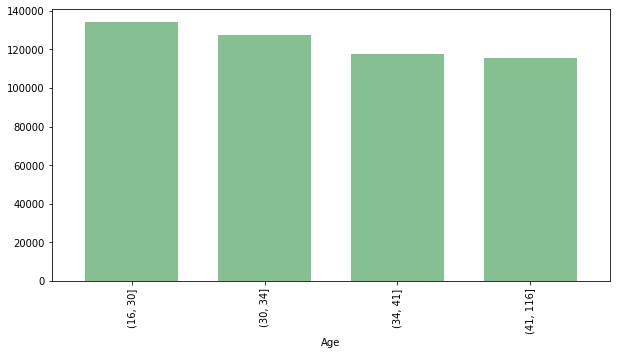

In [184]:
# use the plot function to make a bar plot for the numbers of all age group for NYC
agep1 = ageg['count'].plot(kind='bar', figsize=(10, 5), color='#86bf91', zorder=2, width=0.7)

The age of 16-30 is the large age group of the bike-sharing users in 2016 NYC. The bike-sharing usage's number of four age group is closed.

In [486]:
# use the cut funtion to cut the age group basic on describe results
# use groupby function to group the age range
# print the results
age_bin2 = pd.cut(chi['Age'],[16,30,34,41,116]) 
ageg2 = chi.groupby(age_bin2)['Age'].agg(['count'])
ageg2

,count
Age,
"(16, 30]",22699
"(30, 34]",9407
"(34, 41]",9128
"(41, 116]",13737


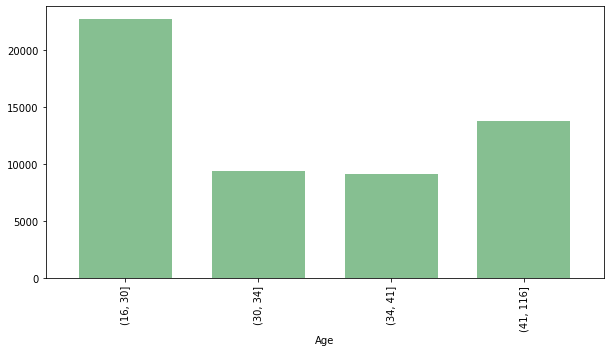

In [487]:
# use the plot function to make a bar plot for the numbers of all age group for Chicago
agep2 = ageg2['count'].plot(kind='bar', figsize=(10, 5), color='#86bf91', zorder=2, width=0.7)

The age of 16-30 is the large age group of the bike-sharing users in 2016 Chicago.

In conclusion, the main age group users of bike-sharing in Chicago and NYC is 16-30. In the Chicago, the four age groups do not have too much difference but NYC. There are almost 10000 times usage's difference between top two age groups, (16-30] and (41-116]. 

### 3. Which gender is the main users in both city

In conclusion, the main gender of bike-sharing usages were male in 2016 Chicago but in NYC,  the main gender of bike-sharing usages were female. 

### 4. Which station is the most popular one?

In Chicago, Streeter Dr & Grand Ave and Phillips Ave & 79th St are the popular stations which have more than 1000 times usage.
In NYC, 

### 5. Which of these two cities was more popular to use the bike sharing services than the other?

#### Compared by the times of bike sharing usage in NYC and Chicago

There are 72131 times bike-sharing's usages in 2016 Chicago. And 494602 times bike-sharing's usages in 2016 NYC. NYC has 7 times more than Chicago. The company should invest more bikes and stations in NYC. 

#### Compared by the trip duration of bike sharing usage in NYC and Chicago
1. find the total trip duration of bike-sharing usage for Chicago and NYC
2. create a new dataframe that contains the trip duration in min for both city
3. use the bar charts to show the difference of bike-sharing between Chicago and NYC.
4. make a conclusion

In [497]:
# use sum function yo sum the trip duration in min of NYC
a = df1['Trip_Duration_in_min'].sum()
a

7296602

In [498]:
# use sum function yo sum the trip duration in min of Chicago
b = chibike['minute'].sum()
b

2147415

In [506]:
# create a new dataframe which contains the trip duration in min for both city
# print the result
c = [['NYC',a],['Chicago',b]]
both = pd.DataFrame(c, columns = ['City','Total duration in min'])
both

,City,Total duration in min
0,NYC,7296602
1,Chicago,2147415


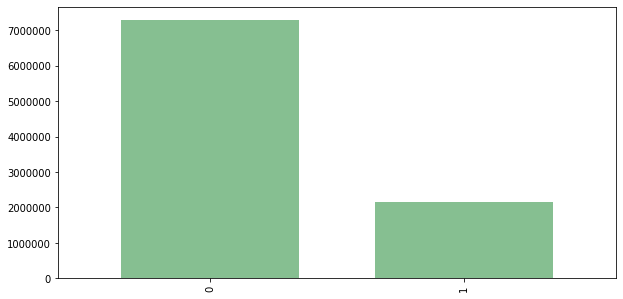

In [510]:
# use bar plot to show the difference between two cities.
both['Total duration in min'].plot(kind='bar', figsize=(10, 5), color='#86bf91', zorder=2, width=0.7)

### In conclusion, the NYC's bike-sharing has the longer trip duration in minute than Chicago in 2016. 

### Consider this situation, the company should pay more attention in NYC market because there are more users, more usages' times, and more trip duration.